## The corresponding code for _Machine Learning-Assisted Raman Spectroscopy for Rapid Classification and Regression Prediction of Radix Bupleuri_

This project consists of the corresponding code for the manuscript 'Machine Learning-Assisted Raman Spectroscopy for Rapid Classification and Regression Prediction of Radix Bupleuri.' It specifically includes the following sections:

### 1.Generation of Spectra and Chromatographic Images
Raman Spectra for Radix Bupleuri Samples from Different Origins and Varieties: By analyzing the Raman spectra, the absorption, emission, or scattering features of Radix Bupleuri samples can be obtained at different wavelengths, helping to differentiate differences among different origins and varieties. This section includes the creation of spectra for Radix Bupleuri samples from different origins and varieties.


### 2.Region Discrimination and Variety Discrimination of Radix Bupleuri
(1)Region discrimination:In this part, a discriminant analysis model(LDA-SVM) was used to classify Radix Bupleuri samples obtained from distinct regions(specifically Inner Mongolia, Gansu, and Shaanxi). The classification outcomes were subsequently assessed using rigorous quantitative metrics, including the construction of a confusion matrix and computation of the F1 score.

(2)Variety discrimination:Similarly，in this part, a discriminant analysis model(LDA-SVM) was used to classify different varieties of Radix Bupleuri(specifically wild and cultivated). The classification outcomes were subsequently assessed using rigorous quantitative metrics, including the construction of a confusion matrix and computation of the F1 score.

### 3.Feature Extraction Based on XGBoost
In this section, the Raman spectra of Radix Bupleuri samples were analyzed using the XGBoost model, identifying the spectral bands that hold significant value for the classification of Radix Bupleuri.

### 4.Regression Analysis for the Determination of Major Component Content
In this section, the LDA-SVR model was used to perform regression analysis and predict the content of the ajor components (SSa, SSc, SSd) in Radix Bupleuri. The regression results were evaluated using R<sup>2</sup> and MSE as metrics.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix,f1_score
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn .decomposition import PCA
from xgboost import XGBRFRegressor,XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
class StandardScaler:
    def fit(self,X):
        X=np.asarray(X)
        self.std=np.std(X,axis=0)
        self.mean=np.mean(X,axis=0)
    def transform(self,X):
        return (X-self.mean)/self.std
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

In [3]:
mpl.rcParams['font.family']='SimHei'
mpl.rcParams['axes.unicode_minus']=False

config = {
            "font.family": 'serif',
            "font.size": 12,
            "mathtext.fontset": 'stix',
            "font.serif": ['Times New Roman'],
            'axes.unicode_minus': False 
         }
rcParams.update(config)

## 1.Generation of Spectra and Chromatographic Images

### (1)Raman Spectra for Radix Bupleuri Samples from Different Origins and Varieties

In [4]:
data1=pd.read_excel("data\Raman datasets(different region).xlsx")
data1=pd.concat([data1.iloc[:,100:1600],data1.iloc[:,-1]],axis=1)
data2=pd.read_excel("data\Raman datasets(black vs. others).xlsx")
data2=pd.concat([data2.iloc[:,100:1600],data2.iloc[:,-1]],axis=1)
data3=pd.read_excel("data\Raman datasets(wild vs cultivated).xlsx")
data3=pd.concat([data3.iloc[:,100:1600],data3.iloc[:,-1]],axis=1)

In [5]:
y1=np.array(np.array(data2[data2['type']==1].iloc[:,:-1].mean()))
y2=np.array(np.array(data2[data2['type']==0].iloc[:,:-1].mean()))
y2=[i+800 for i in y2]
x1=np.linspace(241,3132,1500)
x2=np.linspace(341,3232,1500)

Text(3250, 6000, '(a)')

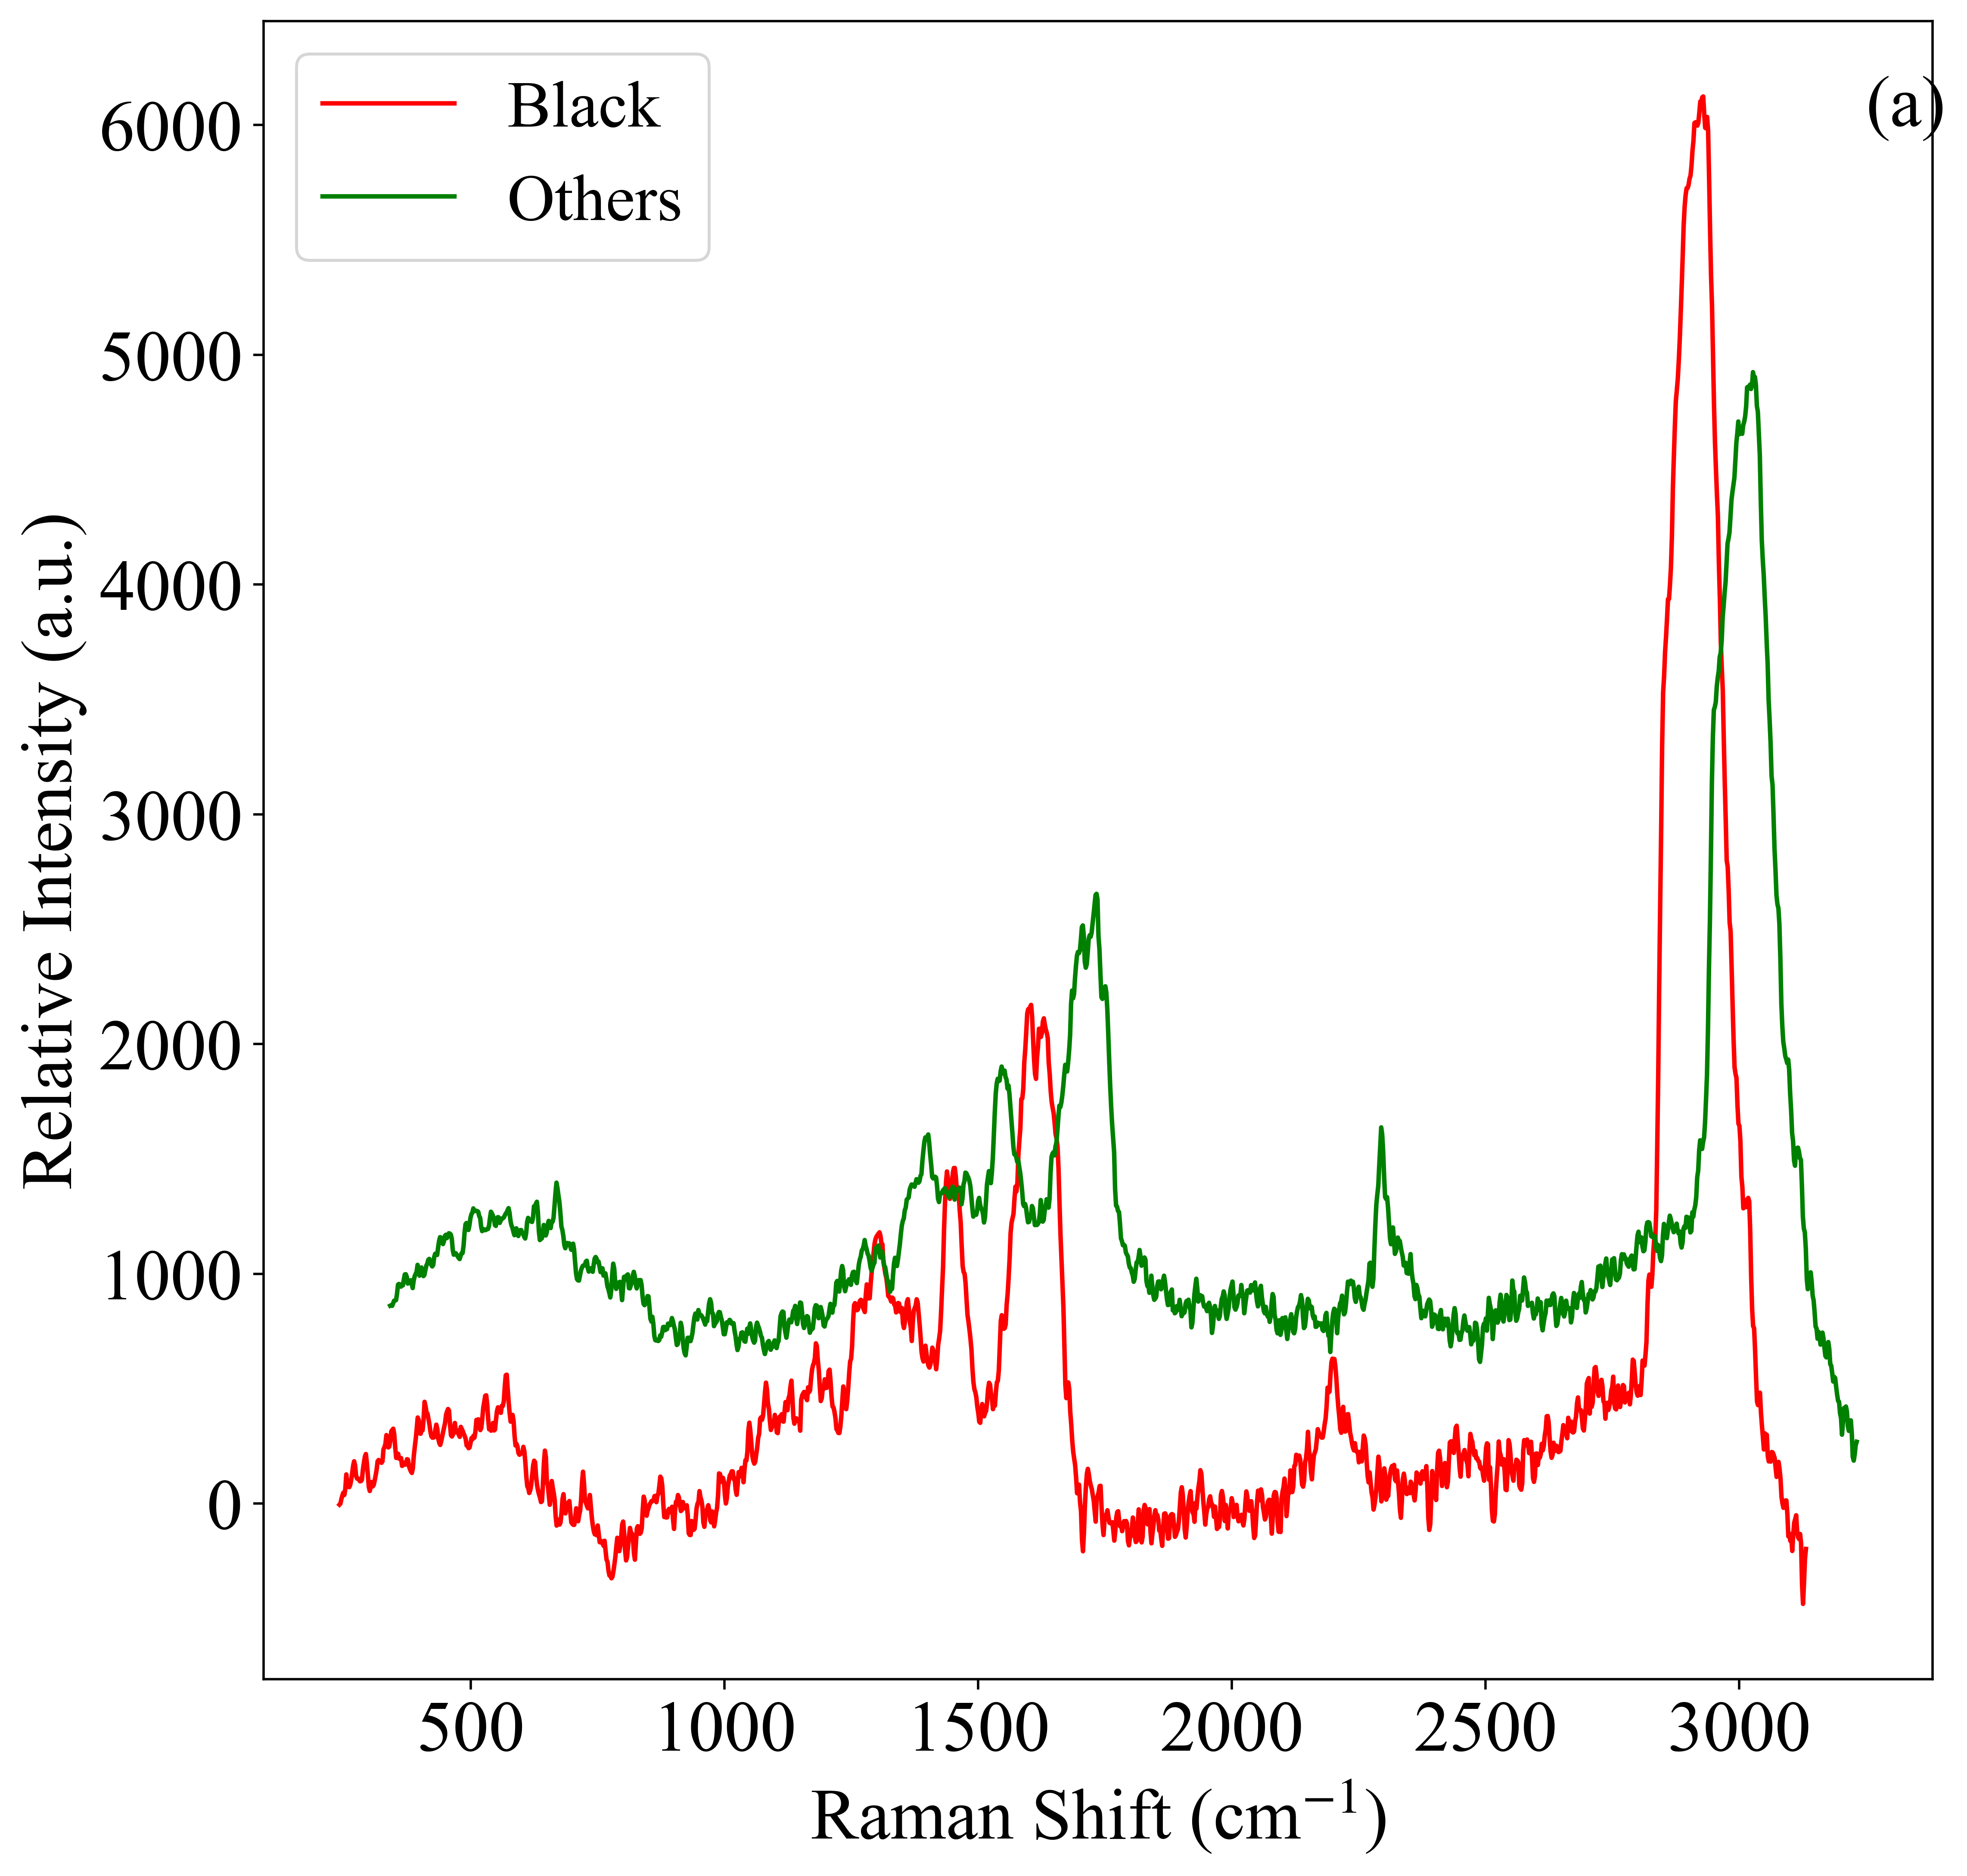

In [6]:
font = {'family': 'Times New Roman','size': 22}
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(10,10)
mpl.rcParams['font.family']='Times New Roman'
mpl.rcParams['axes.unicode_minus']=False

plt.plot(x1,y1,c='r',label='Black')
plt.plot(x2,y2,c='g',label='Others')
plt.legend()

plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.xlabel('Raman Shift (cm$^{-1}$)',size=24)
plt.ylabel('Relative Intensity (a.u.)',size=24)
plt.tick_params(labelsize=24)
plt.rc('font',family='Times New Roman')
plt.text(3250,6000,'(a)',family='Times New Roman',size=24)

Text(3250, 4500, '(a)')

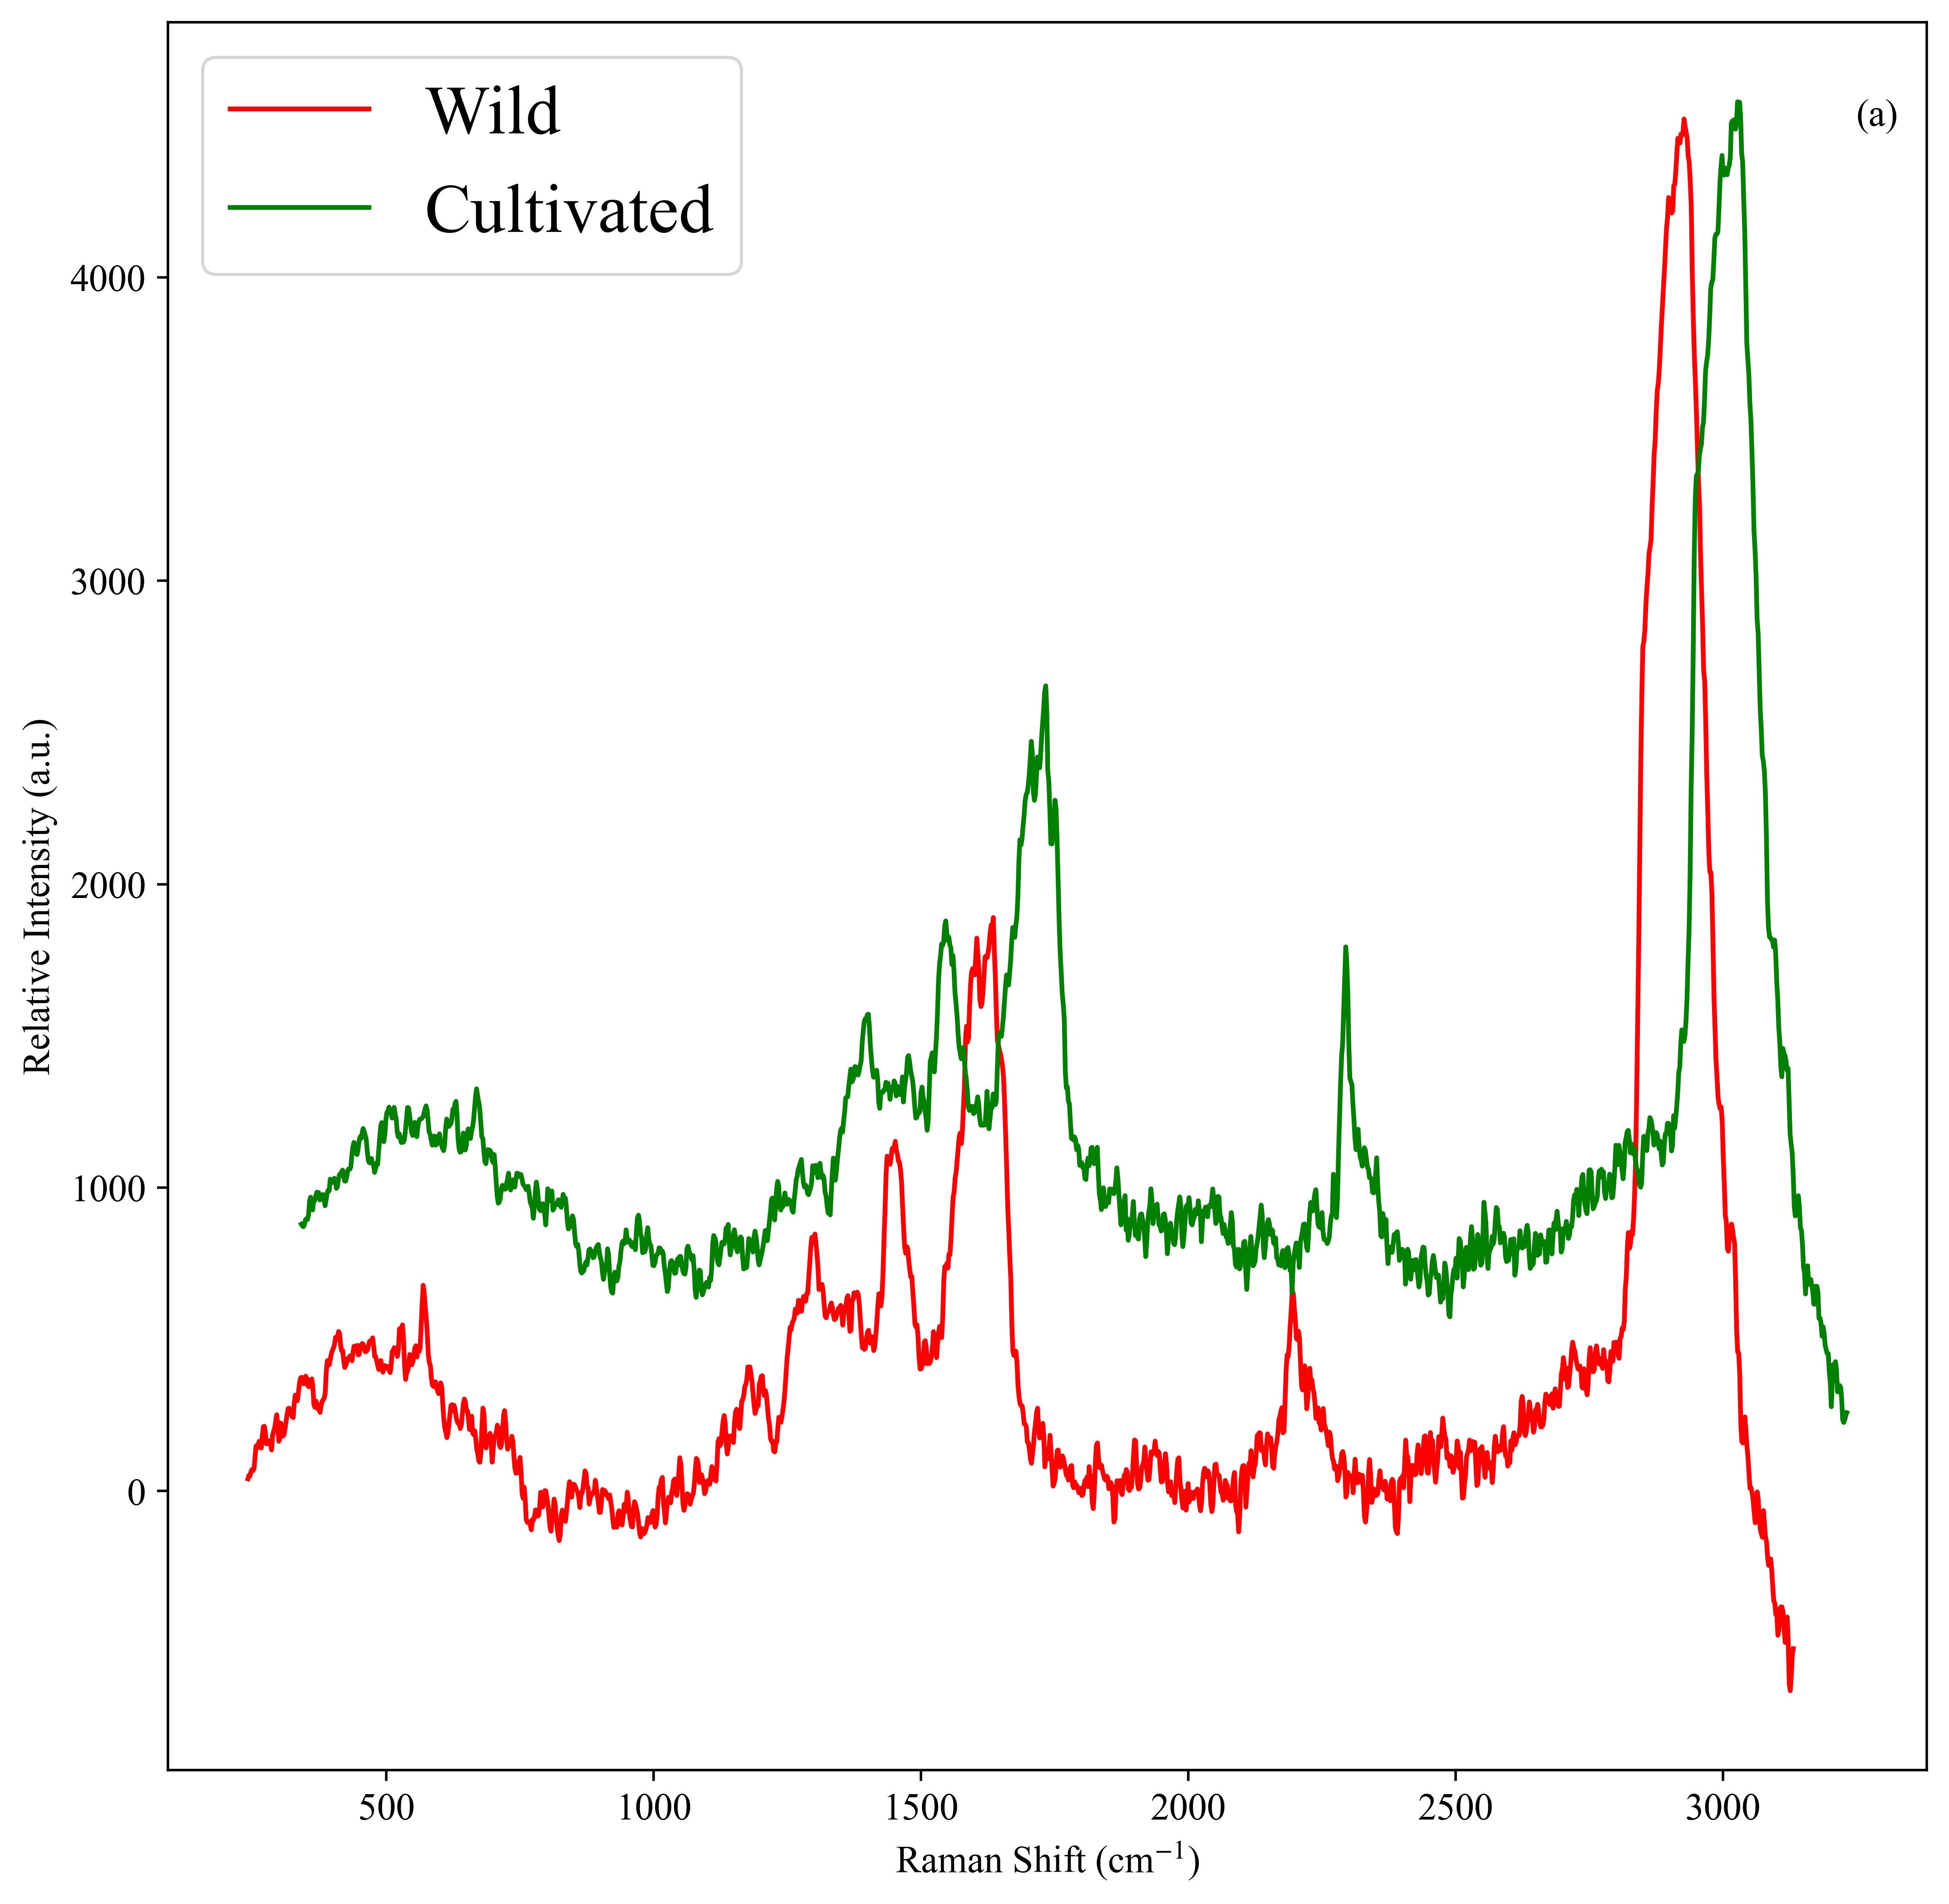

In [7]:
y1=np.array(np.array(data3[data3['type']==0].iloc[:,:-1].mean()))
y2=np.array(np.array(data3[data3['type']==1].iloc[:,:-1].mean()))
y2=[i+800 for i in y2]
x1=np.linspace(241,3132,1500)
x2=np.linspace(341,3232,1500)
plt.plot(x1,y1,c='r',label='Wild')
plt.plot(x2,y2,c='g',label='Cultivated')
plt.legend()
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.xlabel('Raman Shift (cm$^{-1}$)')
plt.ylabel('Relative Intensity (a.u.)')
plt.rc('font',family='Times New Roman')
plt.text(3250,4500,'(a)',family='Times New Roman')

Text(3300, 6000, '(a)')

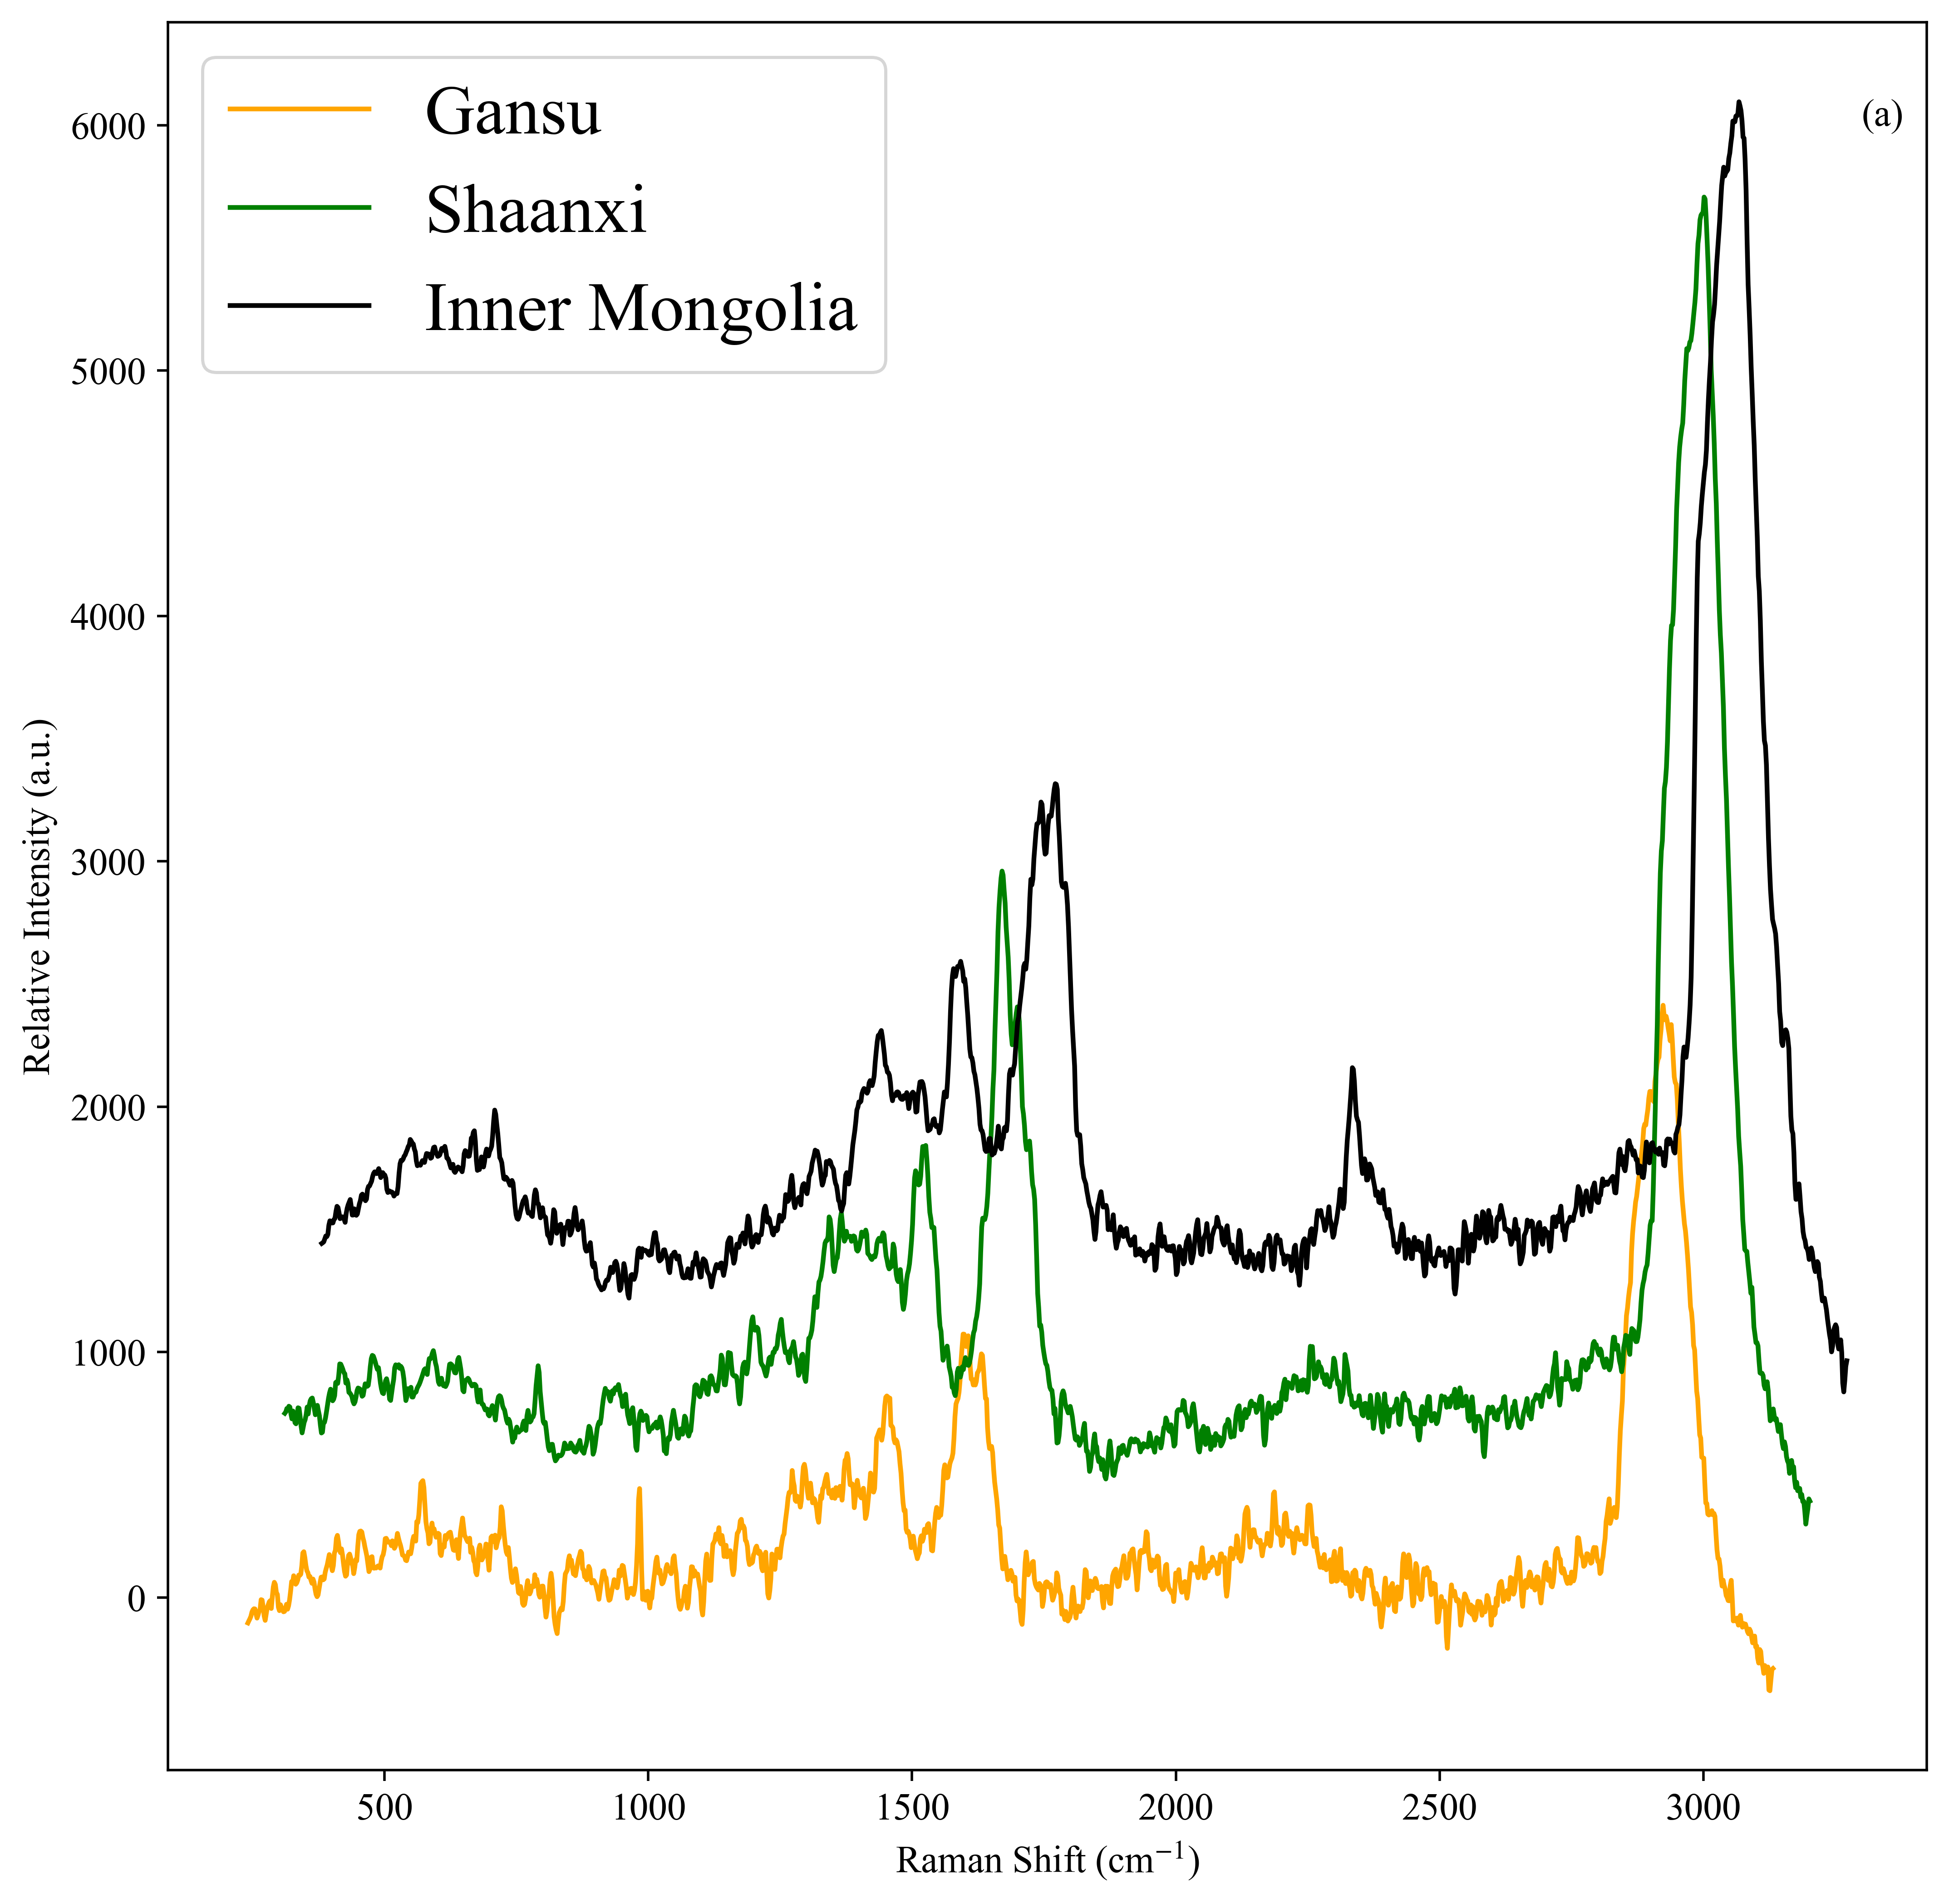

In [8]:
y1=np.array(data1[data1['type']==1].iloc[:,:-1].mean())
y2=np.array(data1[data1['type']==2].iloc[:,:-1].mean())
y3=np.array(data1[data1['type']==0].iloc[:,:-1].mean())
y2=[i+700 for i in y2]
y3=[i+1400 for i in y3]
x1=np.linspace(241,3132,1500)
x2=np.linspace(311,3202,1500)
x3=np.linspace(381,3272,1500)
plt.plot(x1,y1,c='orange',label='Gansu')
plt.plot(x2,y2,c='g',label='Shaanxi')
plt.plot(x3,y3,c='black',label='Inner Mongolia')
plt.legend()
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.xlabel('Raman Shift (cm$^{-1}$)')
plt.ylabel('Relative Intensity (a.u.)')
plt.rc('font',family='Times New Roman')
plt.text(3300,6000,'(a)',family='Times New Roman')

## 2.Region Discrimination and Variety Discrimination of Radix Bupleuri

### (1)Region discrimination

In [9]:
data=pd.read_excel(r"data\Raman datasets(different region).xlsx")
data.head()
data=data.iloc[:,:-1]

In [10]:
s=StandardScaler()
data=s.fit_transform(data)

In [11]:
data=np.array(data)
pca=PCA(n_components=3)
t=pca.fit(data)

In [12]:
a=pca.explained_variance_ratio_
a

array([0.31701156, 0.21980342, 0.0843444 ])

In [13]:
data1=t.transform(data)
data1=pd.DataFrame(data1)
data_1=data1.iloc[0:26,:]
data_2=data1.iloc[26:56,:]
data_3=data1.iloc[56:,:]

In [14]:
x1=data_1.iloc[:,0]
y1=data_1.iloc[:,1]
x2=data_2.iloc[:,0]
y2=data_2.iloc[:,1]
x3=data_3.iloc[:,0]
y3=data_3.iloc[:,2]
x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)
x3=np.array(x3)
y3=np.array(y3)

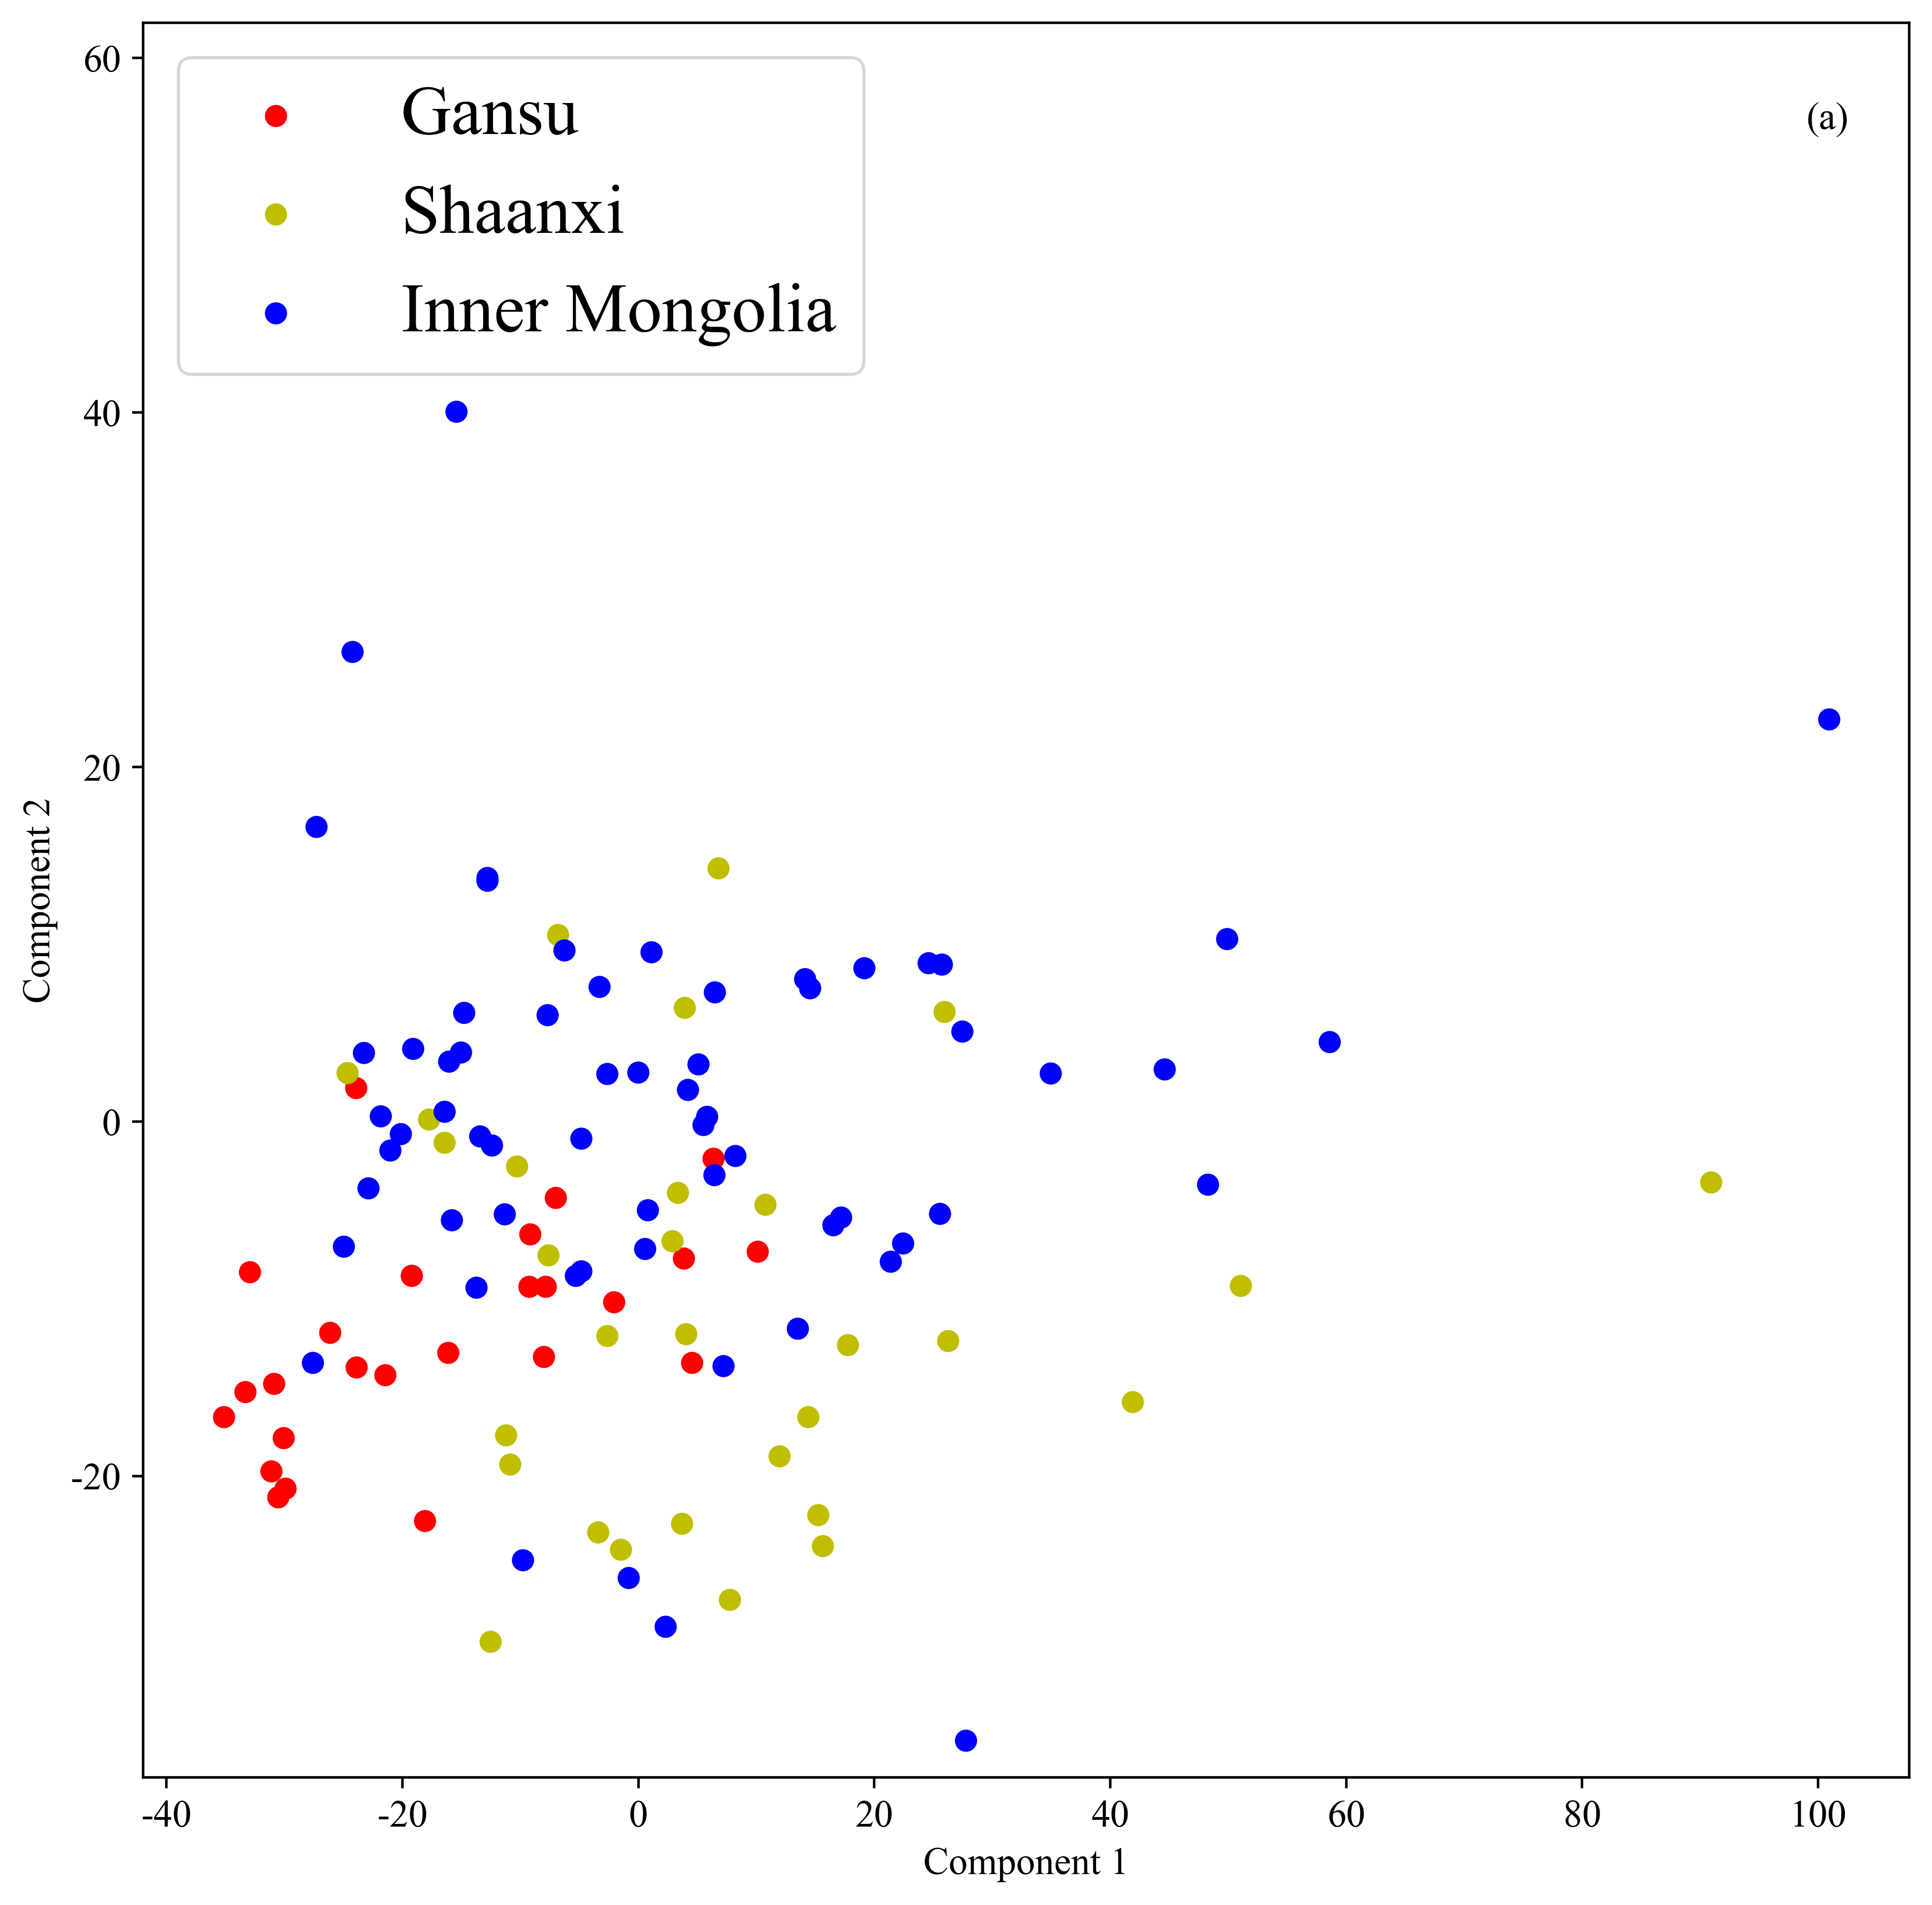

In [15]:
plt.scatter(x1,y1,color='r',label='Gansu')
plt.scatter(x2,y2,color='y',label='Shaanxi')
plt.scatter(x3,y3,color='b',label='Inner Mongolia')

plt.xlabel('Component 1',family='Times New Roman')
plt.ylabel('Component 2',family='Times New Roman')
plt.legend()
plt.ylim(-37,62)
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.text(99,56,'(a)',family='Times New Roman')
plt.show()

In [16]:
data=pd.read_excel(r"data\Raman datasets(different region).xlsx")
x=data.iloc[:,:-1]
x=s.fit_transform(x)
y=data.iloc[:,-1]

In [17]:
lda=LDA(n_components=2)
result=lda.fit_transform(x,y)
data=pd.DataFrame(result)

In [18]:
data_1=data.iloc[0:26,:]
data_2=data.iloc[26:56,:]
data_3=data.iloc[56:,:]
x1=data_1.iloc[:,0]
y1=data_1.iloc[:,1]
x2=data_2.iloc[:,0]
y2=data_2.iloc[:,1]
x3=data_3.iloc[:,0]
y3=data_3.iloc[:,1]
x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)
x3=np.array(x3)
y3=np.array(y3)

In [19]:
a=lda.explained_variance_ratio_
a

array([0.74662338, 0.25337662])

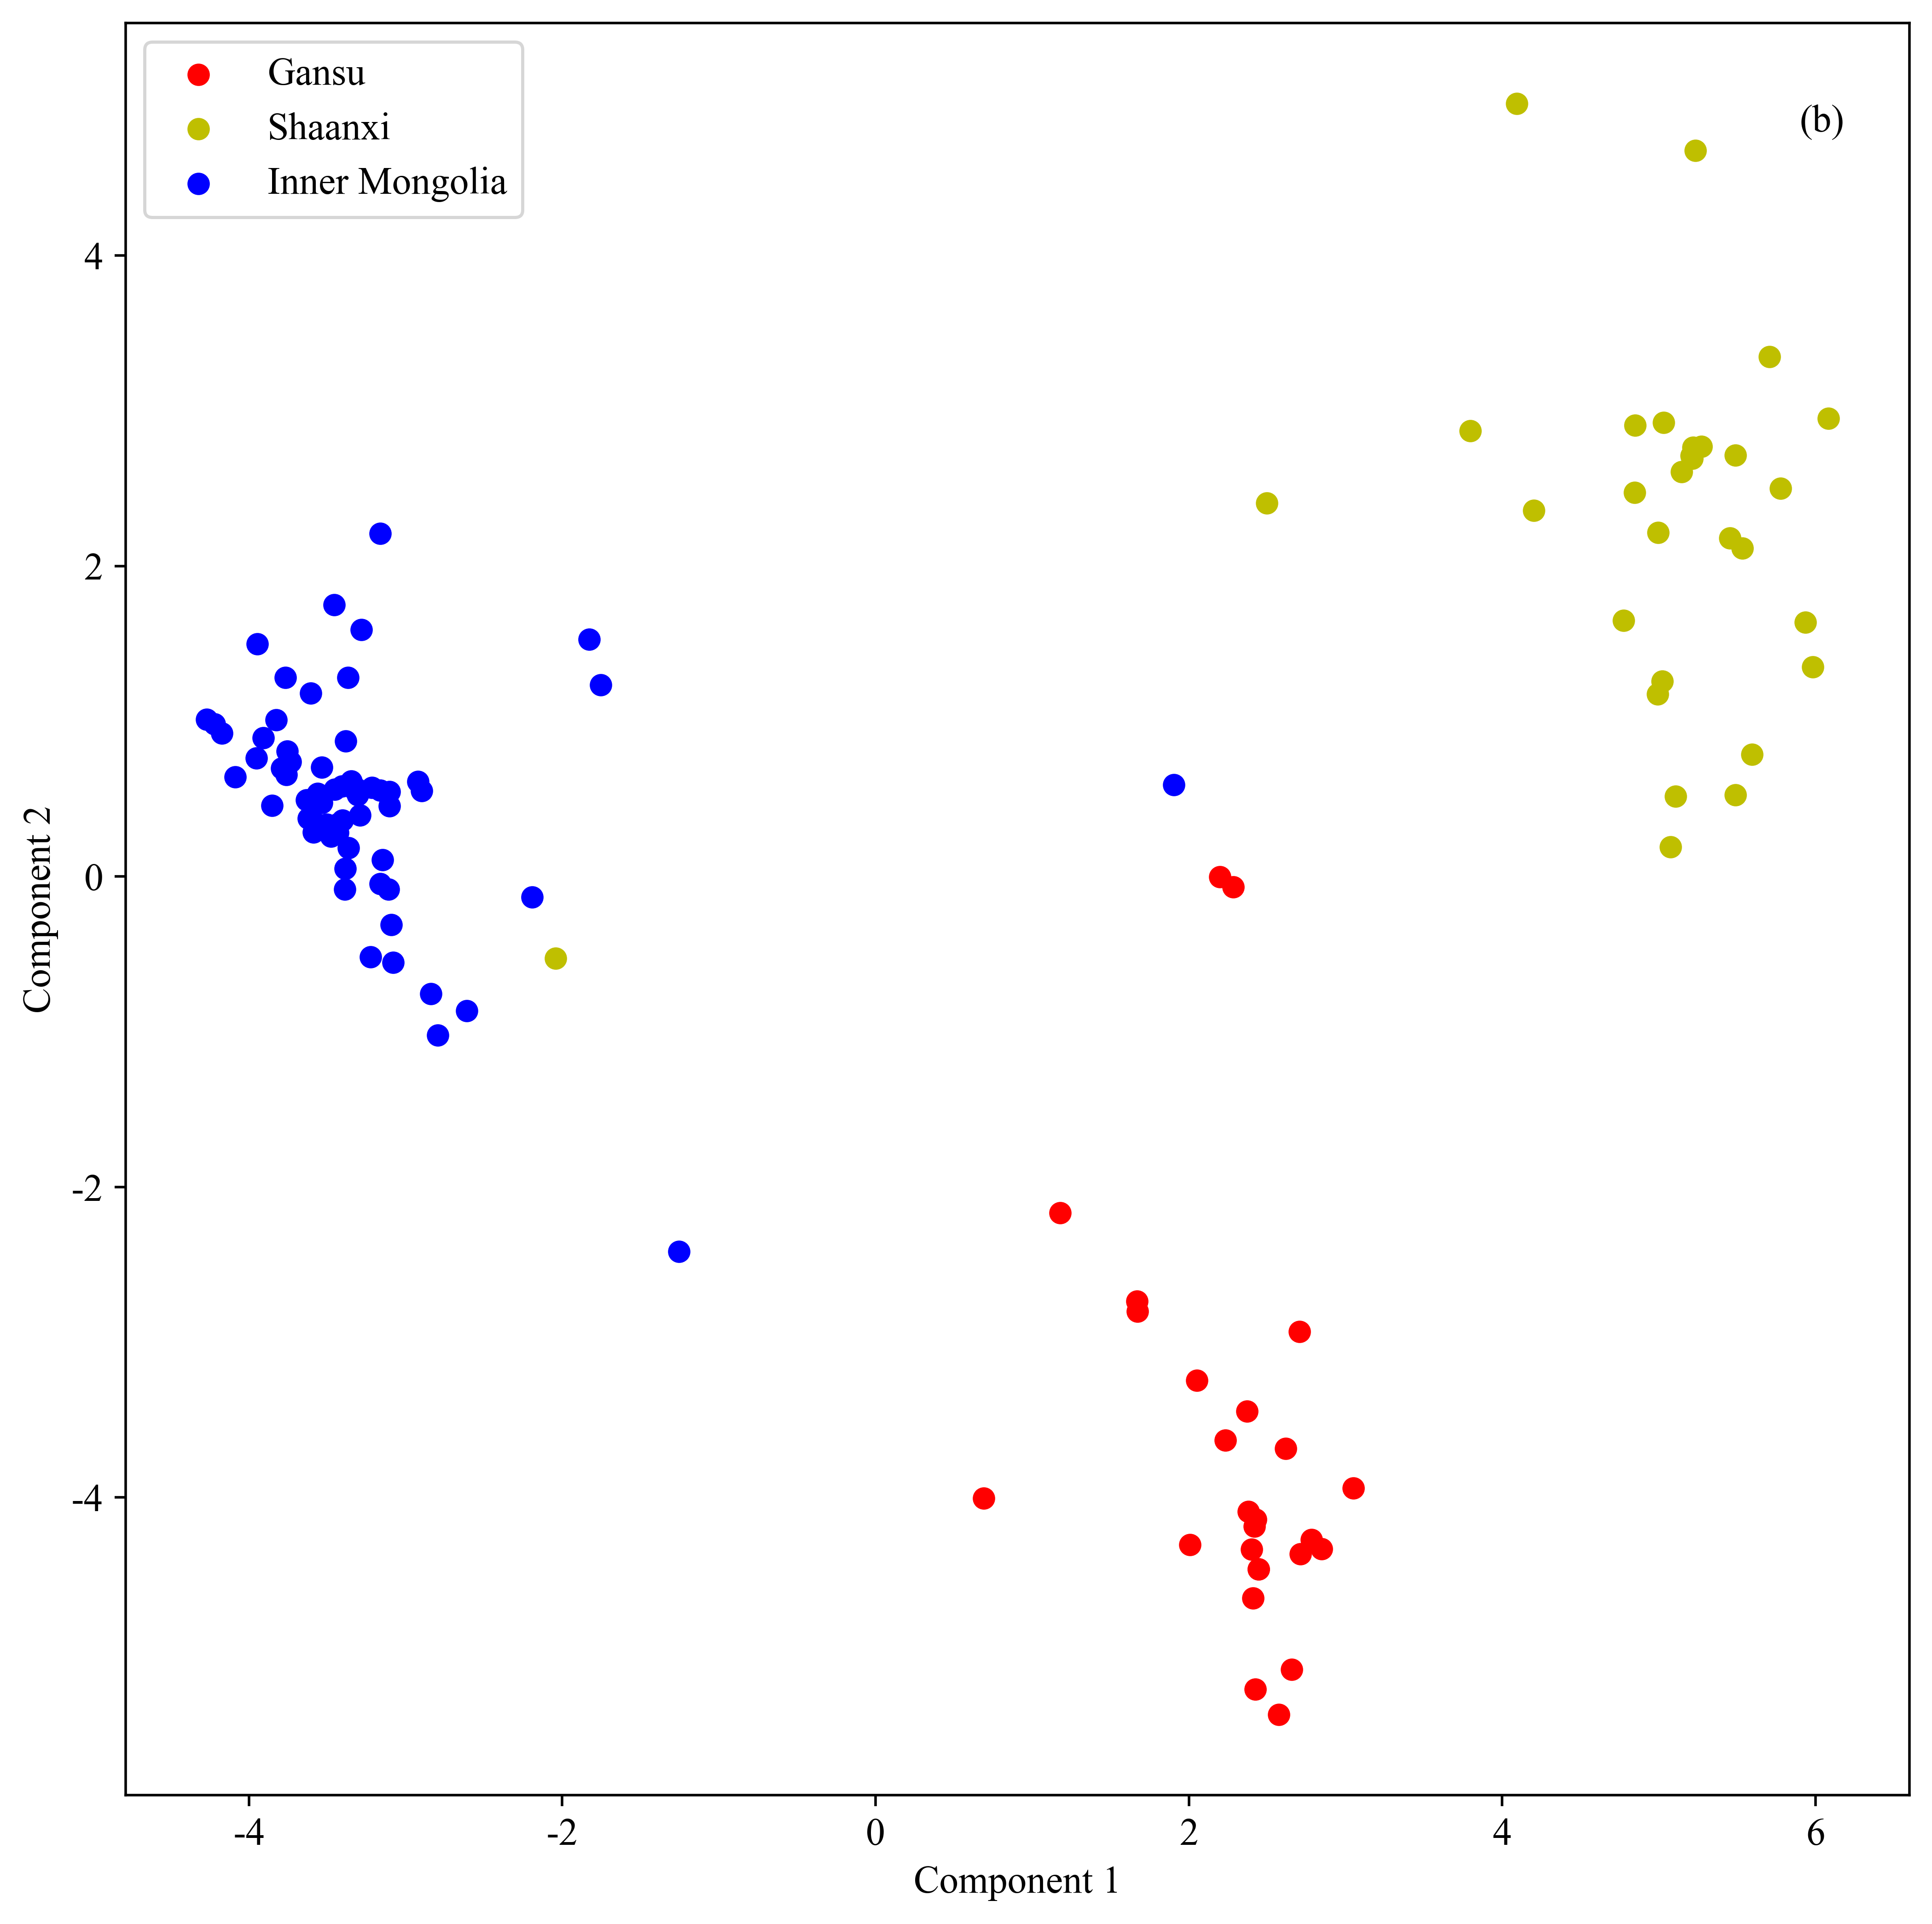

In [20]:
plt.scatter(x1,y1,color='r',label='Gansu')
plt.scatter(x2,y2,color='y',label='Shaanxi')
plt.scatter(x3,y3,color='b',label='Inner Mongolia')
plt.xlabel('Component 1',family='Times New Roman')
plt.ylabel('Component 2',family='Times New Roman')

font = {'family': 'Times New Roman'}
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.rc('font',family='Times New Roman')
plt.text(5.9,4.8,'(b)',family='Times New Roman')
plt.show()

In [21]:
data2=pd.concat([data,y],axis=1)
data2=data2.sample(len(data2), random_state=8)
data2

0         1  type
100 -3.305567  0.524886     0
29   5.706681  3.347451     2
17   2.399753 -4.334930     1
57  -3.161175  2.209620     0
87  -4.220521  0.980425     0
..        ...       ...   ...
5    2.704858 -2.932143     1
105 -3.605791  1.180676     0
113 -3.162294 -0.048209     0
84  -3.102048  0.545626     0
67  -3.214475  0.571285     0

[119 rows x 3 columns]

In [22]:
train_x=data2.iloc[:70,:-1]
train_y=data2.iloc[:70,-1]
test_x=data2.iloc[70:,:-1]
test_y=data2.iloc[70:,-1]

In [23]:
model=SVC(C=10,kernel='rbf')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print(a/len(test_y))
C=confusion_matrix(test_y,predict)
print(C)

0.9591836734693877
[[27  1  0]
 [ 0 10  0]
 [ 1  0 10]]


In [24]:
model=SVC(C=10,kernel='rbf')
model.fit(test_x,test_y)
predict2=model.predict(train_x)
b=np.sum(train_y==predict2)/len(train_y)
print(b)
C=confusion_matrix(predict2,train_y)
print(C)
print(f1_score(train_y,predict2,average='macro'))

0.9714285714285714
[[35  2  0]
 [ 0 14  0]
 [ 0  0 19]]
0.9685185185185184


In [25]:
model=SVC(C=10,kernel='linear')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print(a/len(test_y))
C=confusion_matrix(test_y,predict)
print(C)
f1_score(predict,test_y,average='macro')

0.9387755102040817
[[27  1  0]
 [ 0 10  0]
 [ 1  1  9]]


0.9244588744588745

### (2)Variety discrimination

In [26]:
# PCA
data=pd.read_excel(r"data\Raman datasets(black vs. others).xlsx")
data.head()
data=data.iloc[:,:-1]
data=s.fit_transform(data)

In [27]:
data=np.array(data)
pca=PCA(n_components=3)
t=pca.fit(data)

In [28]:
a=pca.explained_variance_ratio_
a

array([0.35422088, 0.2326763 , 0.08467834])

In [29]:
data1=t.transform(data)
data1=pd.DataFrame(data1)
data_1=data1.iloc[0:18,:]
data_2=data1.iloc[18:,:]

In [30]:
x1=data_1.iloc[:,0]
y1=data_1.iloc[:,1]
x2=data_2.iloc[:,0]
y2=data_2.iloc[:,1]

x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)

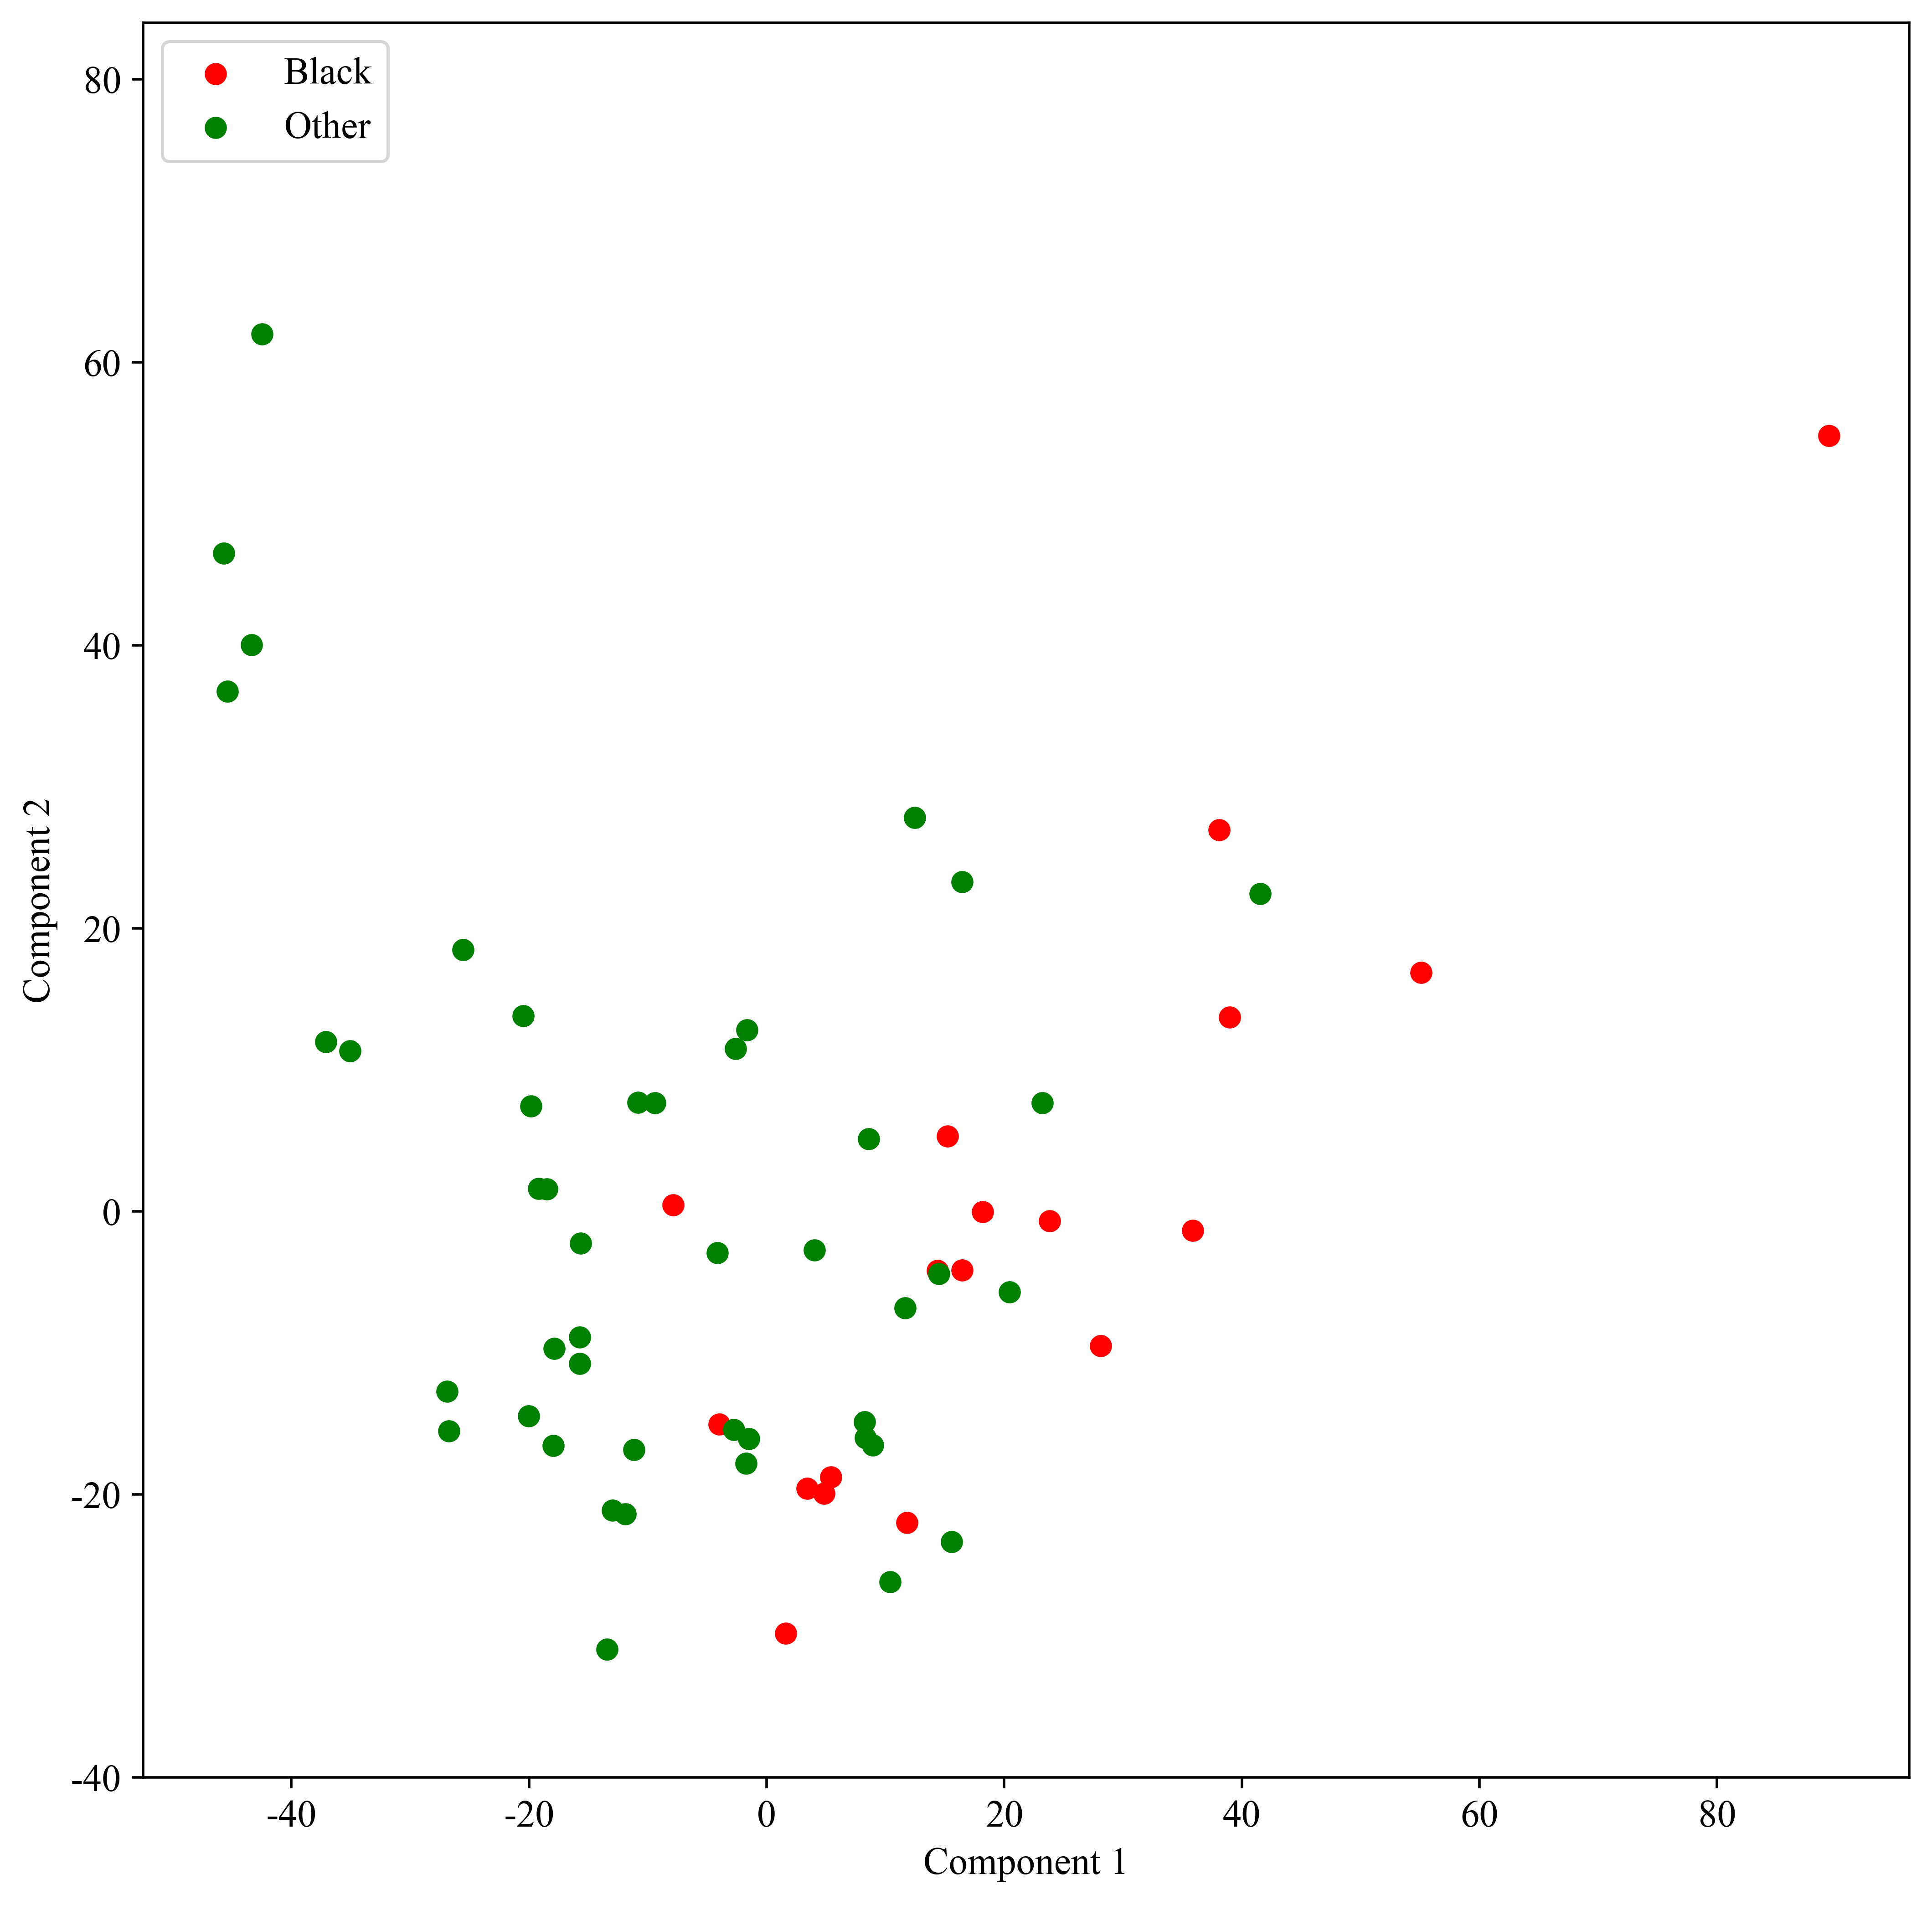

In [31]:
plt.scatter(x1,y1,color='r',label='Black')
plt.scatter(x2,y2,color='g',label='Other')
plt.xlabel('Component 1',family='Times New Roman')
plt.ylabel('Component 2',family='Times New Roman')
plt.legend()
plt.ylim(-40,84)
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.show()

In [32]:
data=pd.read_excel(r"data\Raman datasets(black vs. others).xlsx")
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

s=StandardScaler()
x=s.fit_transform(x)

In [33]:
lda=LDA(n_components=1)
result=lda.fit_transform(x,y)
data=pd.DataFrame(result)

data_1=data.iloc[0:18,:]
data_2=data.iloc[18:,:]
final=pd.concat([data,y],axis=1)
final

0  type
0   2.381571     1
1   1.354676     1
2  -0.964385     1
3   1.033820     1
4   3.760764     1
..       ...   ...
58 -0.204112     0
59 -0.739236     0
60 -1.490892     0
61  0.934803     0
62  3.146918     0

[63 rows x 2 columns]

In [34]:
y1=data.iloc[:18,:]
y2=data.iloc[18:,:]
x1=np.ones(18)
x2=np.zeros(45)

In [35]:
a=lda.explained_variance_ratio_
a

array([1.])

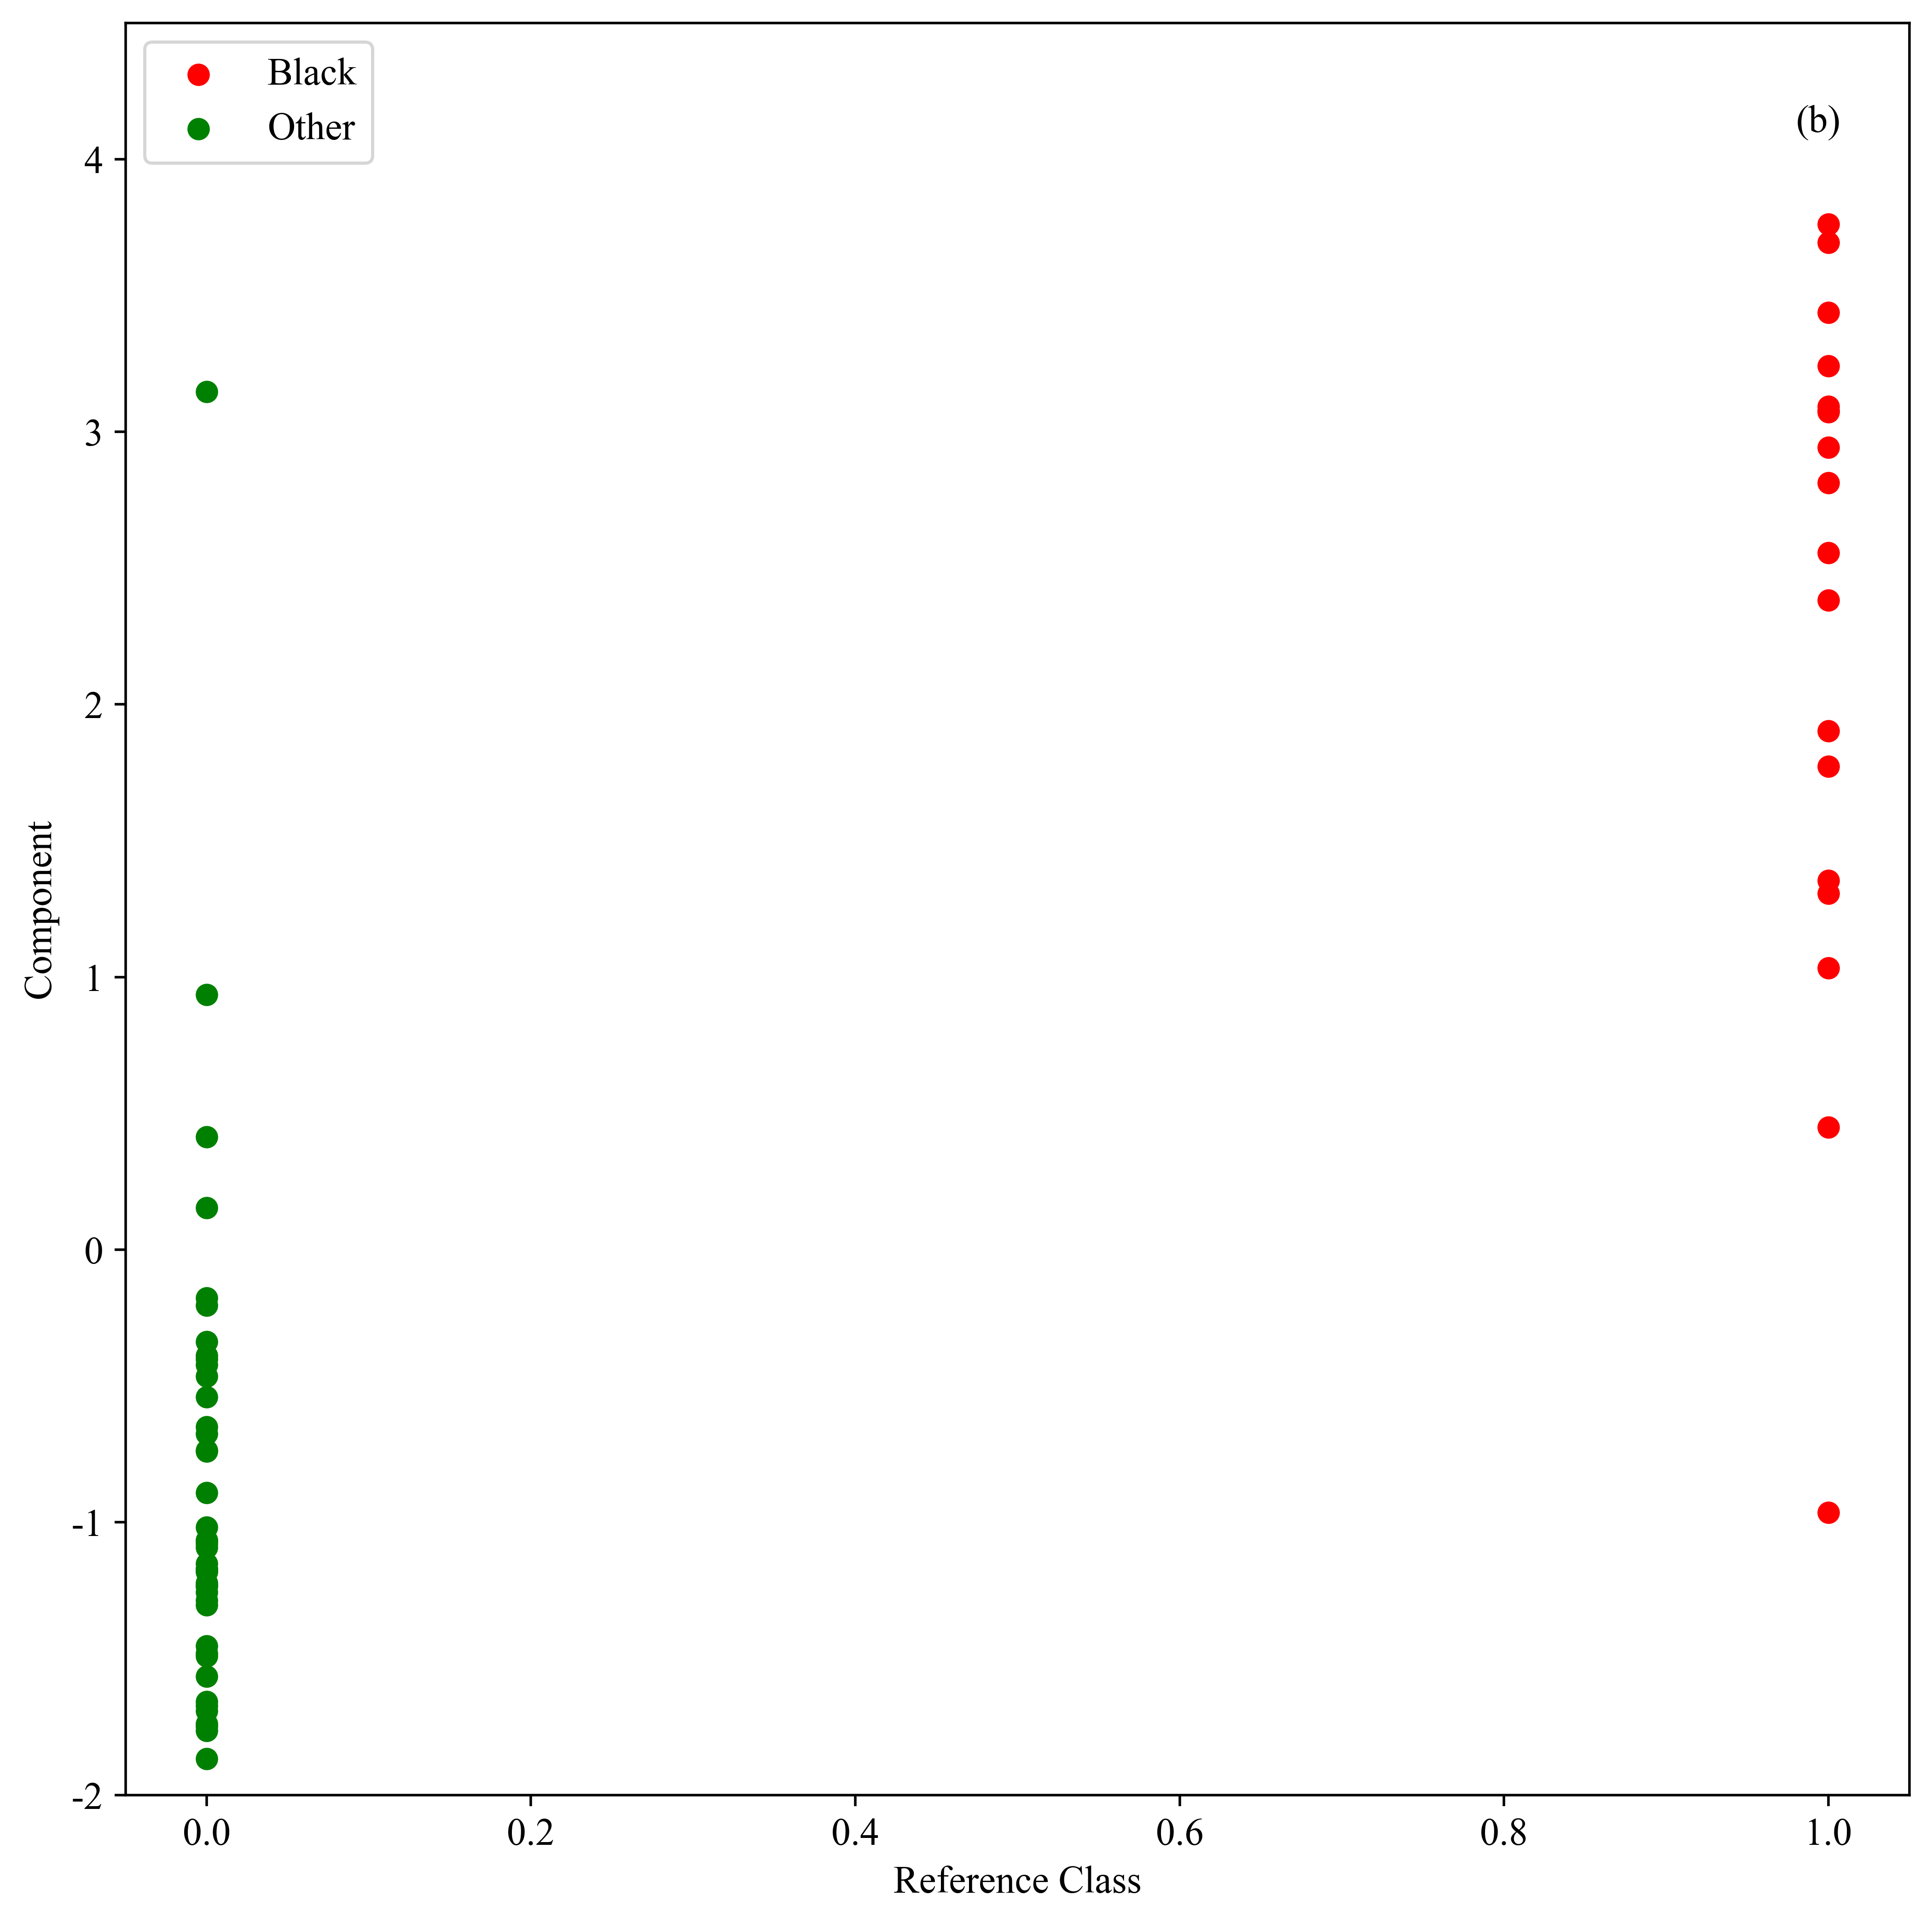

In [36]:
plt.scatter(x1,y1,color='r',label='Black')
plt.scatter(x2,y2,color='g',label='Other')
plt.xlabel('Reference Class',family='Times New Roman')
plt.ylabel('Component',family='Times New Roman')
plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.ylim(-2,4.5)
plt.rc('font',family='Times New Roman')
plt.text(0.98,4.1,'(b)',family='Times New Roman')
plt.show()

In [37]:
data=data.sample(len(data),random_state=0)
y=y.sample(len(y),random_state=0)

train_x=data.iloc[:40]
train_y=y.iloc[:40]
test_x=data.iloc[40:]
test_y=y.iloc[40:]

In [38]:
model=SVC(C=10,kernel='rbf')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print(a/len(test_y))

C=confusion_matrix(predict,test_y)
print(C)
f1_score(test_y,predict,average='macro')

0.9130434782608695
[[14  0]
 [ 2  7]]


0.9041666666666668

In [39]:
model=SVC(C=10,kernel='linear')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print(a/len(test_y))
C=confusion_matrix(predict,test_y)
print(C)
f1_score(test_y,predict,average='macro')

0.9565217391304348
[[15  0]
 [ 1  7]]


0.9505376344086022

In [40]:
model=SVC(C=10,kernel='linear')
model.fit(test_x,test_y)
predict2=model.predict(train_x)
b=np.sum(train_y==predict2)/len(train_y)
print(b)
C=confusion_matrix(predict2,train_y)
print(C)
print(f1_score(train_y,predict2,average='macro'))

0.925
[[28  2]
 [ 1  9]]
0.9031476997578693


In [41]:
model=SVC(C=10,kernel='rbf')
model.fit(test_x,test_y)
predict2=model.predict(train_x)
b=np.sum(train_y==predict2)/len(train_y)
print(b)
C=confusion_matrix(train_y,predict2)
print(C)
print(f1_score(predict2,train_y,average='macro'))

0.925
[[28  1]
 [ 2  9]]
0.9031476997578693


# Variety discrimination wild vs. cultivated

In [42]:
data=pd.read_excel(r"data\Raman datasets(wild vs cultivated).xlsx")
data.head()
data=data.iloc[:,:-1]
data=s.fit_transform(data)

In [43]:
from sklearn .decomposition import PCA
data=np.array(data)
pca=PCA(n_components=3)
t=pca.fit(data)

In [44]:
a=pca.explained_variance_ratio_
a

array([0.3247692 , 0.23237791, 0.09430501])

In [45]:
data1=t.transform(data)
data1=pd.DataFrame(data1)
data_1=data1.iloc[0:23,:]
data_2=data1.iloc[23:,:]

In [46]:
x1=data_1.iloc[:,0]
y1=data_1.iloc[:,1]
x2=data_2.iloc[:,0]
y2=data_2.iloc[:,1]

x1=np.array(x1)
y1=np.array(y1)
x2=np.array(x2)
y2=np.array(y2)

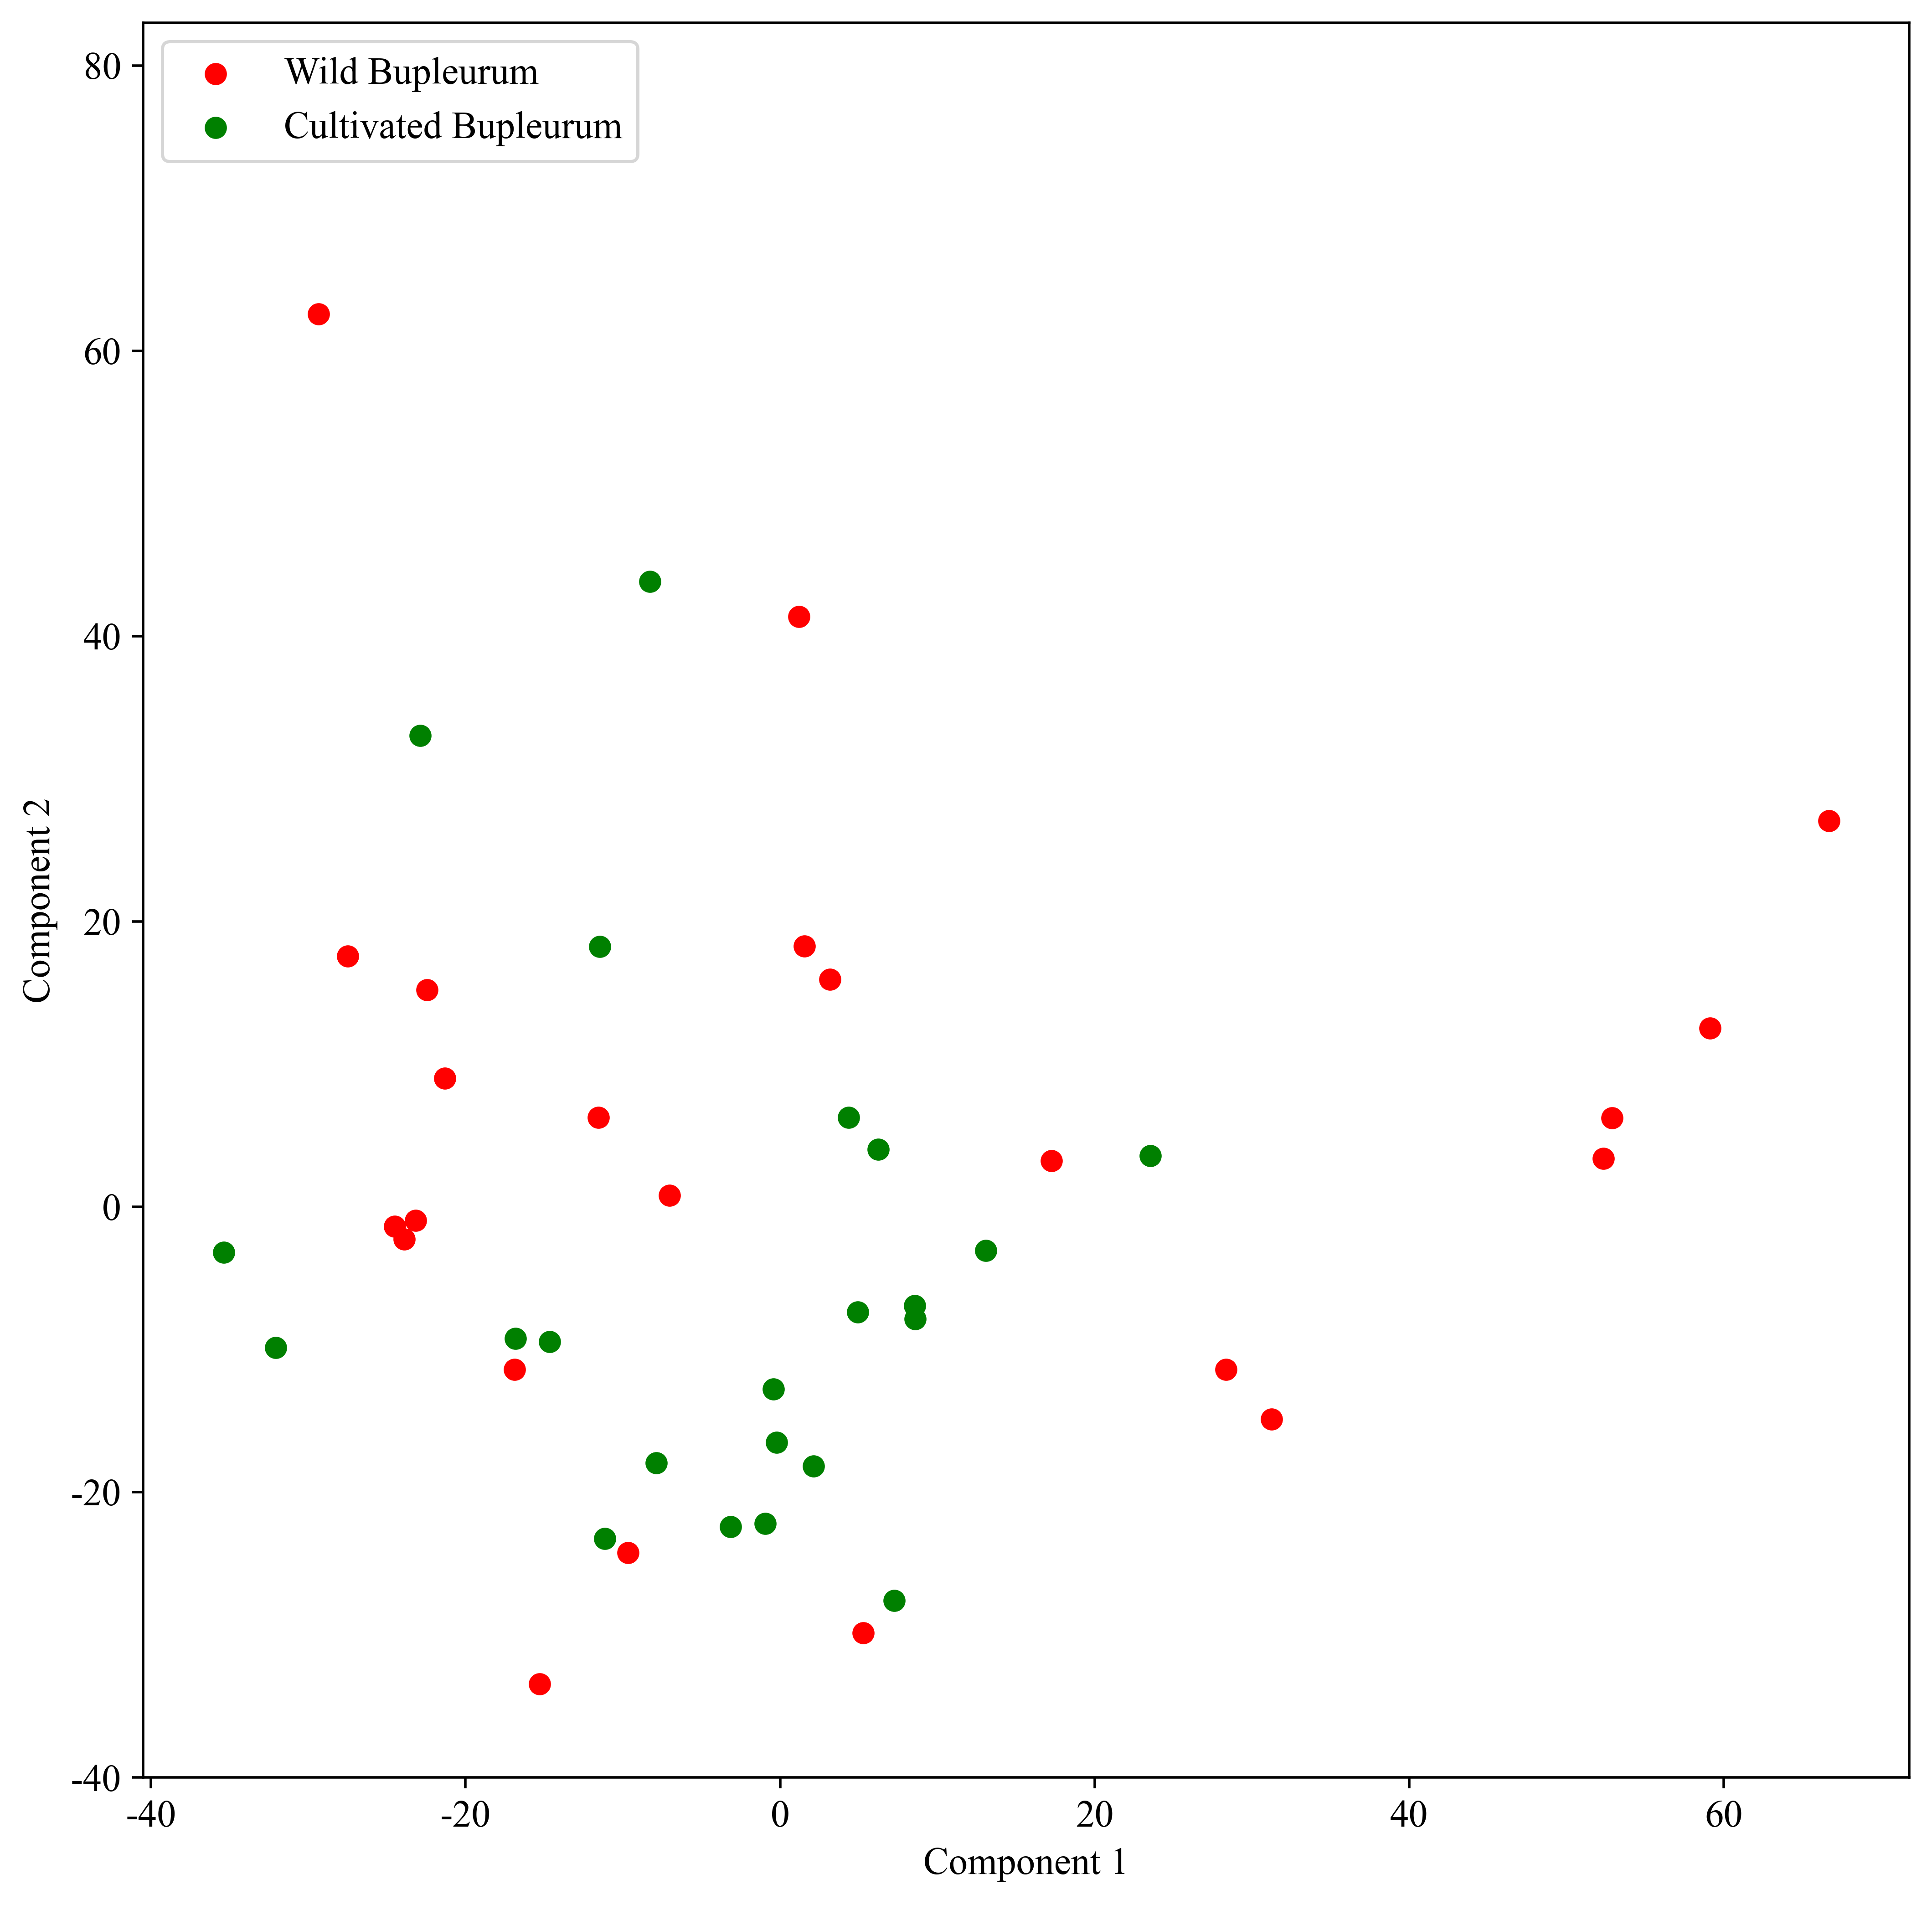

In [47]:
plt.scatter(x1,y1,color='r',label='Wild Bupleurum')
plt.scatter(x2,y2,color='g',label='Cultivated Bupleurum')
plt.xlabel('Component 1',family='Times New Roman')
plt.ylabel('Component 2',family='Times New Roman')

plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.ylim(-40,83)
plt.show()

In [48]:
data=pd.read_excel(r"data\Raman datasets(wild vs cultivated).xlsx")
x=data.iloc[:,:-1]
x=s.fit_transform(x)
y=data.iloc[:,-1]

In [49]:
lda=LDA(n_components=1)
result=lda.fit_transform(x,y)
data=pd.DataFrame(result)

In [50]:
data_1=data.iloc[0:23,:]
data_2=data.iloc[23:,:]

In [51]:
y1=data.iloc[:21,:]
y2=data.iloc[21:,:]
x1=np.ones(21)
x2=np.zeros(24)

Text(0.98, 3.1, '(b)')

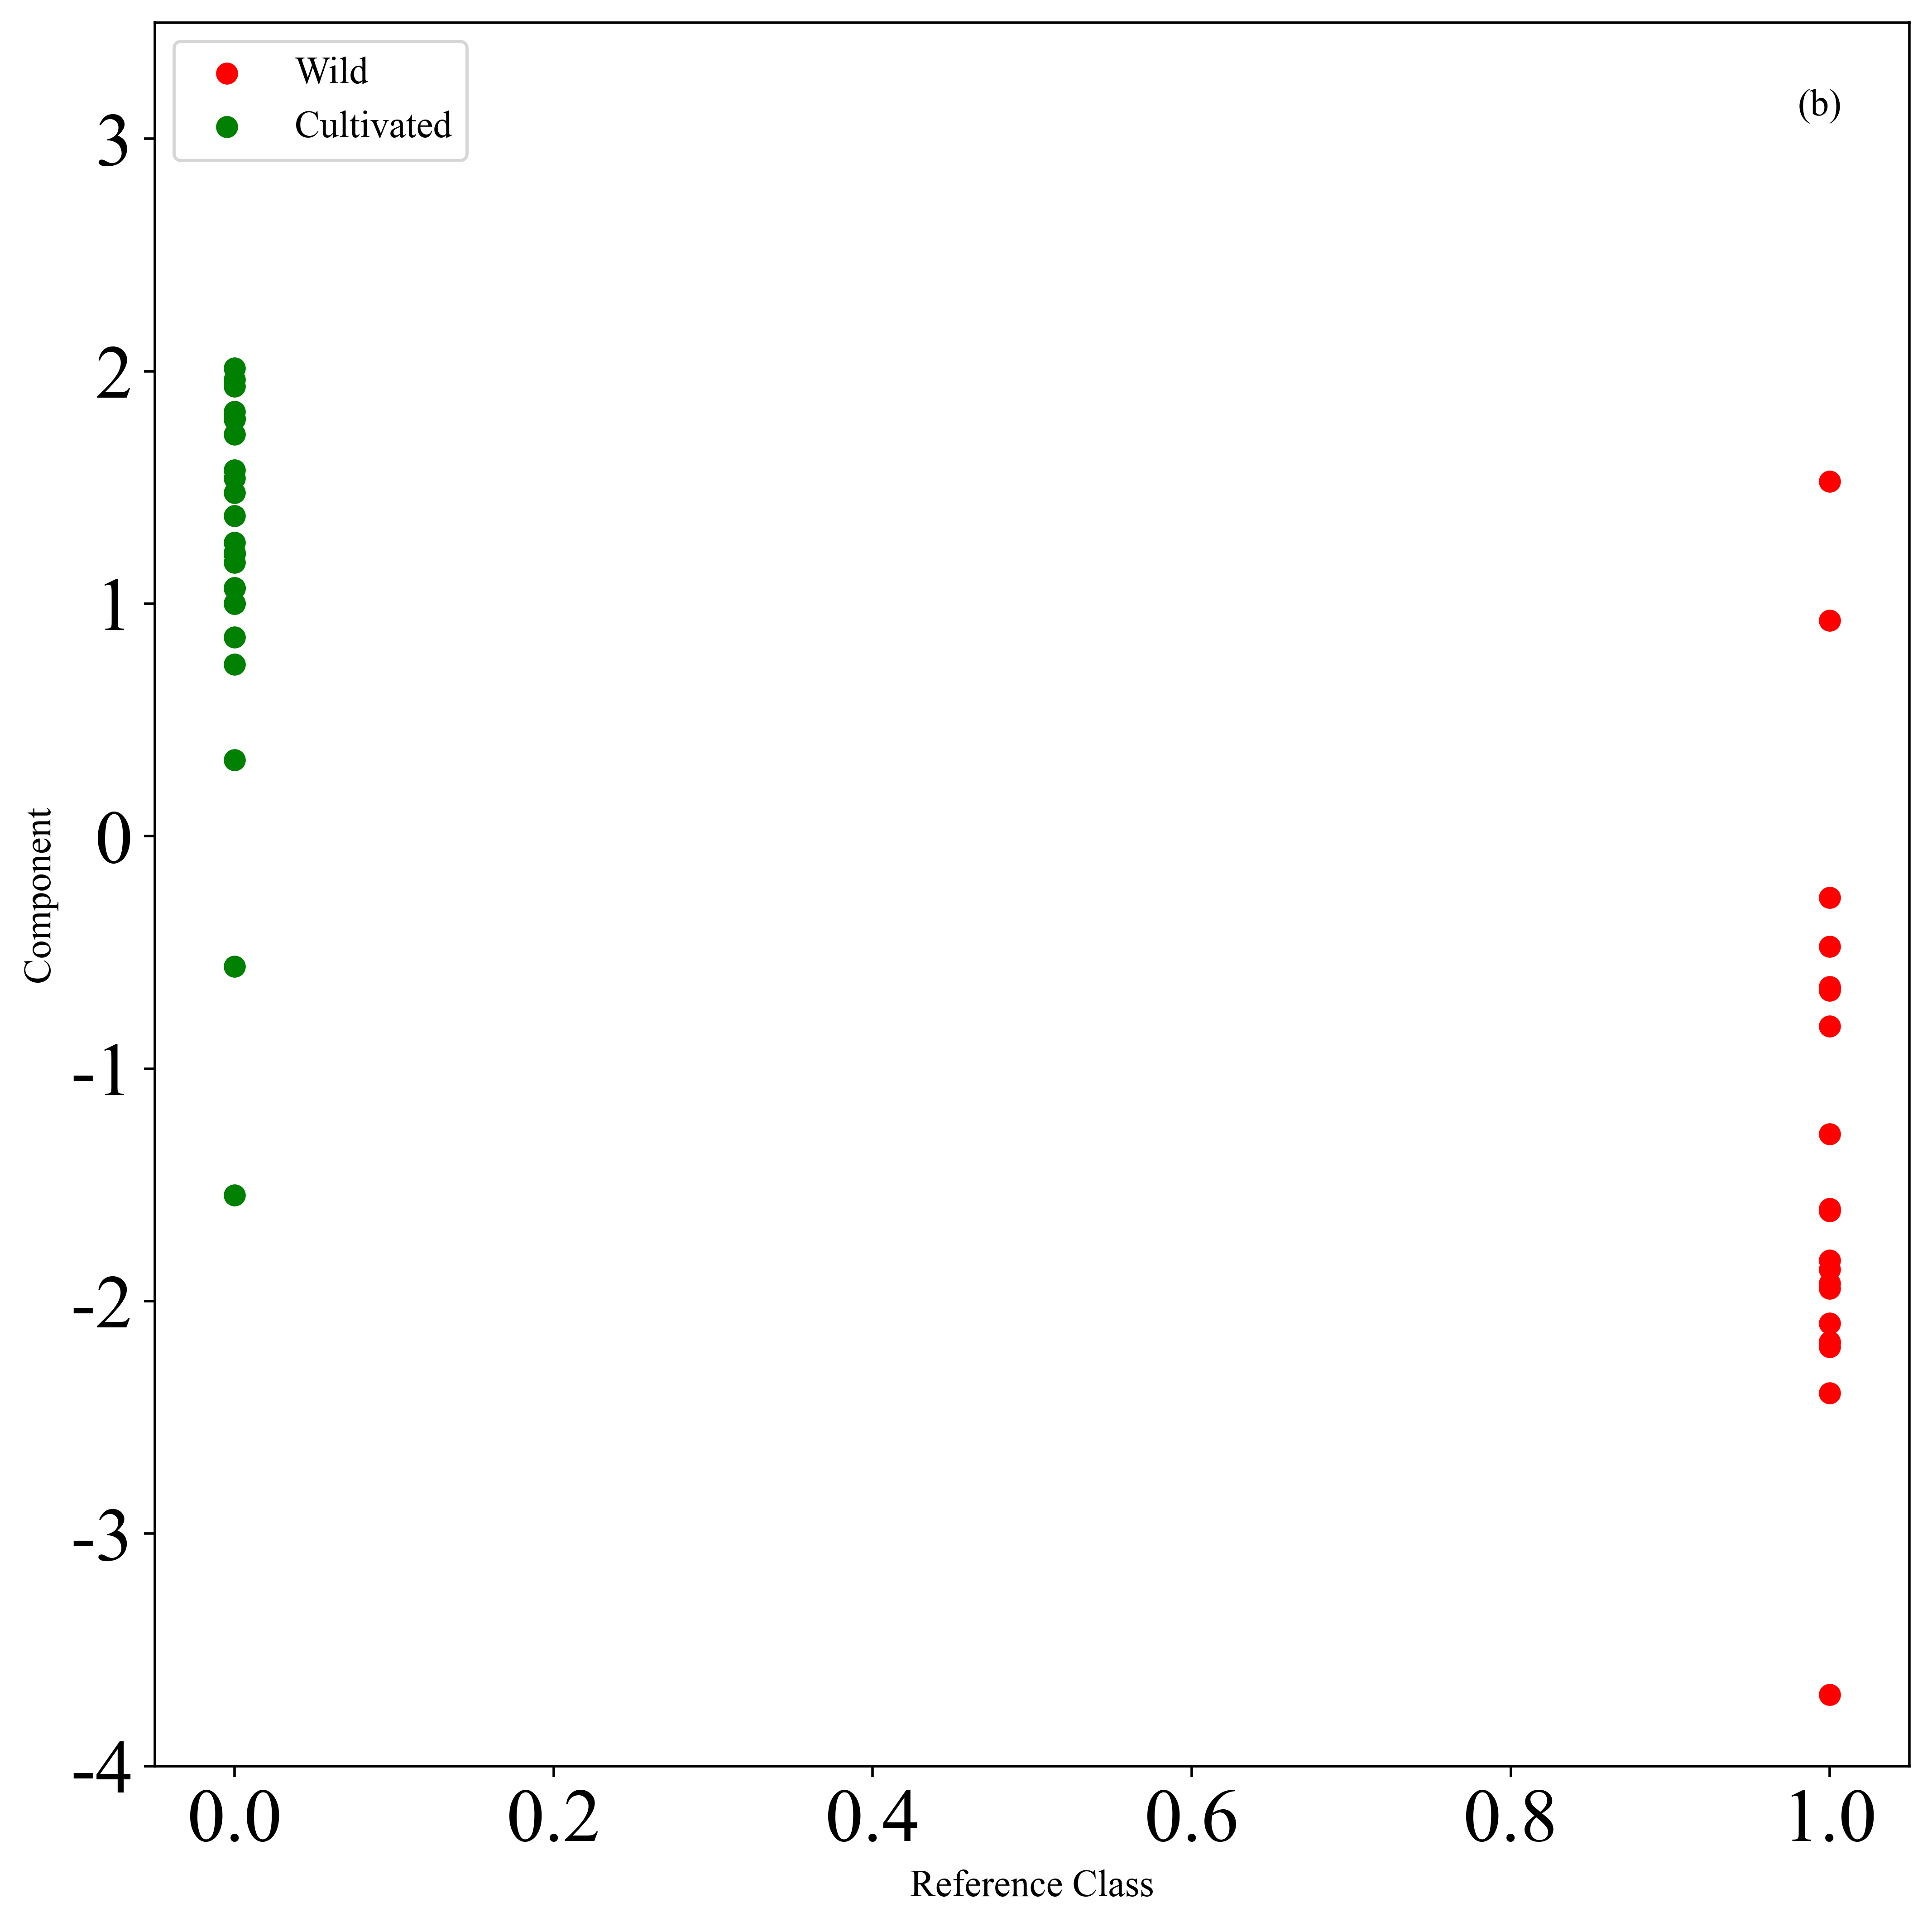

In [52]:
plt.scatter(x1,y1,color='r',label='Wild')
plt.scatter(x2,y2,color='g',label='Cultivated')
plt.ylim(-4,3.5)

plt.legend(loc="upper left",prop=font)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.tick_params(labelsize=24)
plt.xlabel('Reference Class',family='Times New Roman')
plt.ylabel('Component',family='Times New Roman')
plt.text(0.98,3.1,'(b)',family='Times New Roman')

In [53]:
data=data.sample(len(data),random_state=6)
y=y.sample(len(y),random_state=6)
train_x=data.iloc[:30]
train_y=y.iloc[:30]
test_x=data.iloc[30:]
test_y=y.iloc[30:]

In [54]:
model=SVC(C=10,kernel='linear')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print('准确率:',a/len(test_y))
C=confusion_matrix(predict,test_y)
print(C)
f1_score(test_y,predict,average='macro')

准确率: 0.8666666666666667
[[8 0]
 [2 5]]


0.8611111111111112

In [55]:
model=SVC(C=10,kernel='rbf')
model.fit(train_x,train_y)
predict=model.predict(test_x)
a=np.sum(test_y==predict)
print('准确率:',a/len(test_y))
C=confusion_matrix(predict,test_y)
print(C)
f1_score(test_y,predict,average='macro')

准确率: 0.8666666666666667
[[8 0]
 [2 5]]


0.8611111111111112

In [56]:
model=SVC(C=10,kernel='linear')
model.fit(test_x,test_y)
predict2=model.predict(train_x)
b=np.sum(train_y==predict2)/len(train_y)
print(b)
C=confusion_matrix(predict2,train_y)
print(C)
print(f1_score(train_y,predict2,average='macro'))

0.9333333333333333
[[11  2]
 [ 0 17]]
0.9305555555555556


In [57]:
model=SVC(C=10,kernel='rbf')
model.fit(test_x,test_y)
predict2=model.predict(train_x)
b=np.sum(train_y==predict2)/len(train_y)
print(b)
C=confusion_matrix(predict2,train_y)
print(C)
print(f1_score(train_y,predict2,average='macro'))

0.9333333333333333
[[11  2]
 [ 0 17]]
0.9305555555555556


## 3.Feature Extraction Based on XGBoost

In [58]:
data=pd.read_excel("data/Raman datasets(different region).xlsx")
data=data.sample(len(data),random_state=0)
data_x=data.iloc[:,:-1]
data_x=s.fit_transform(data_x)
data_y=data.iloc[:,-1]
colums=pd.DataFrame(data.columns)
colums.head()

0
0  50.32098
1  52.24945
2  54.17792
3  56.10638
4  58.03485

In [59]:
train_x=data_x.iloc[:80,:]
train_y=data_y.iloc[:80]
test_x=data_x.iloc[80:,:]
test_y=data_y.iloc[80:]
model=XGBClassifier()
model.fit(train_x,train_y)
result=model.predict(test_x)
print(np.sum(result==test_y)/len(test_y))
result

0.8717948717948718


array([1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0], dtype=int64)

In [60]:
a=model.feature_importances_
a=pd.DataFrame(a)
data_new=pd.concat([colums,a],axis=1,ignore_index=True)  
data_new.drop([1738],inplace=True)
data_new.columns=['type','value']
data1=data_new.sort_values(by='value',axis=0,ascending=False)
data2=data1.iloc[:30,0]
data2=data2.tolist()
w=list(np.array(data2).flatten())
w.append('type')

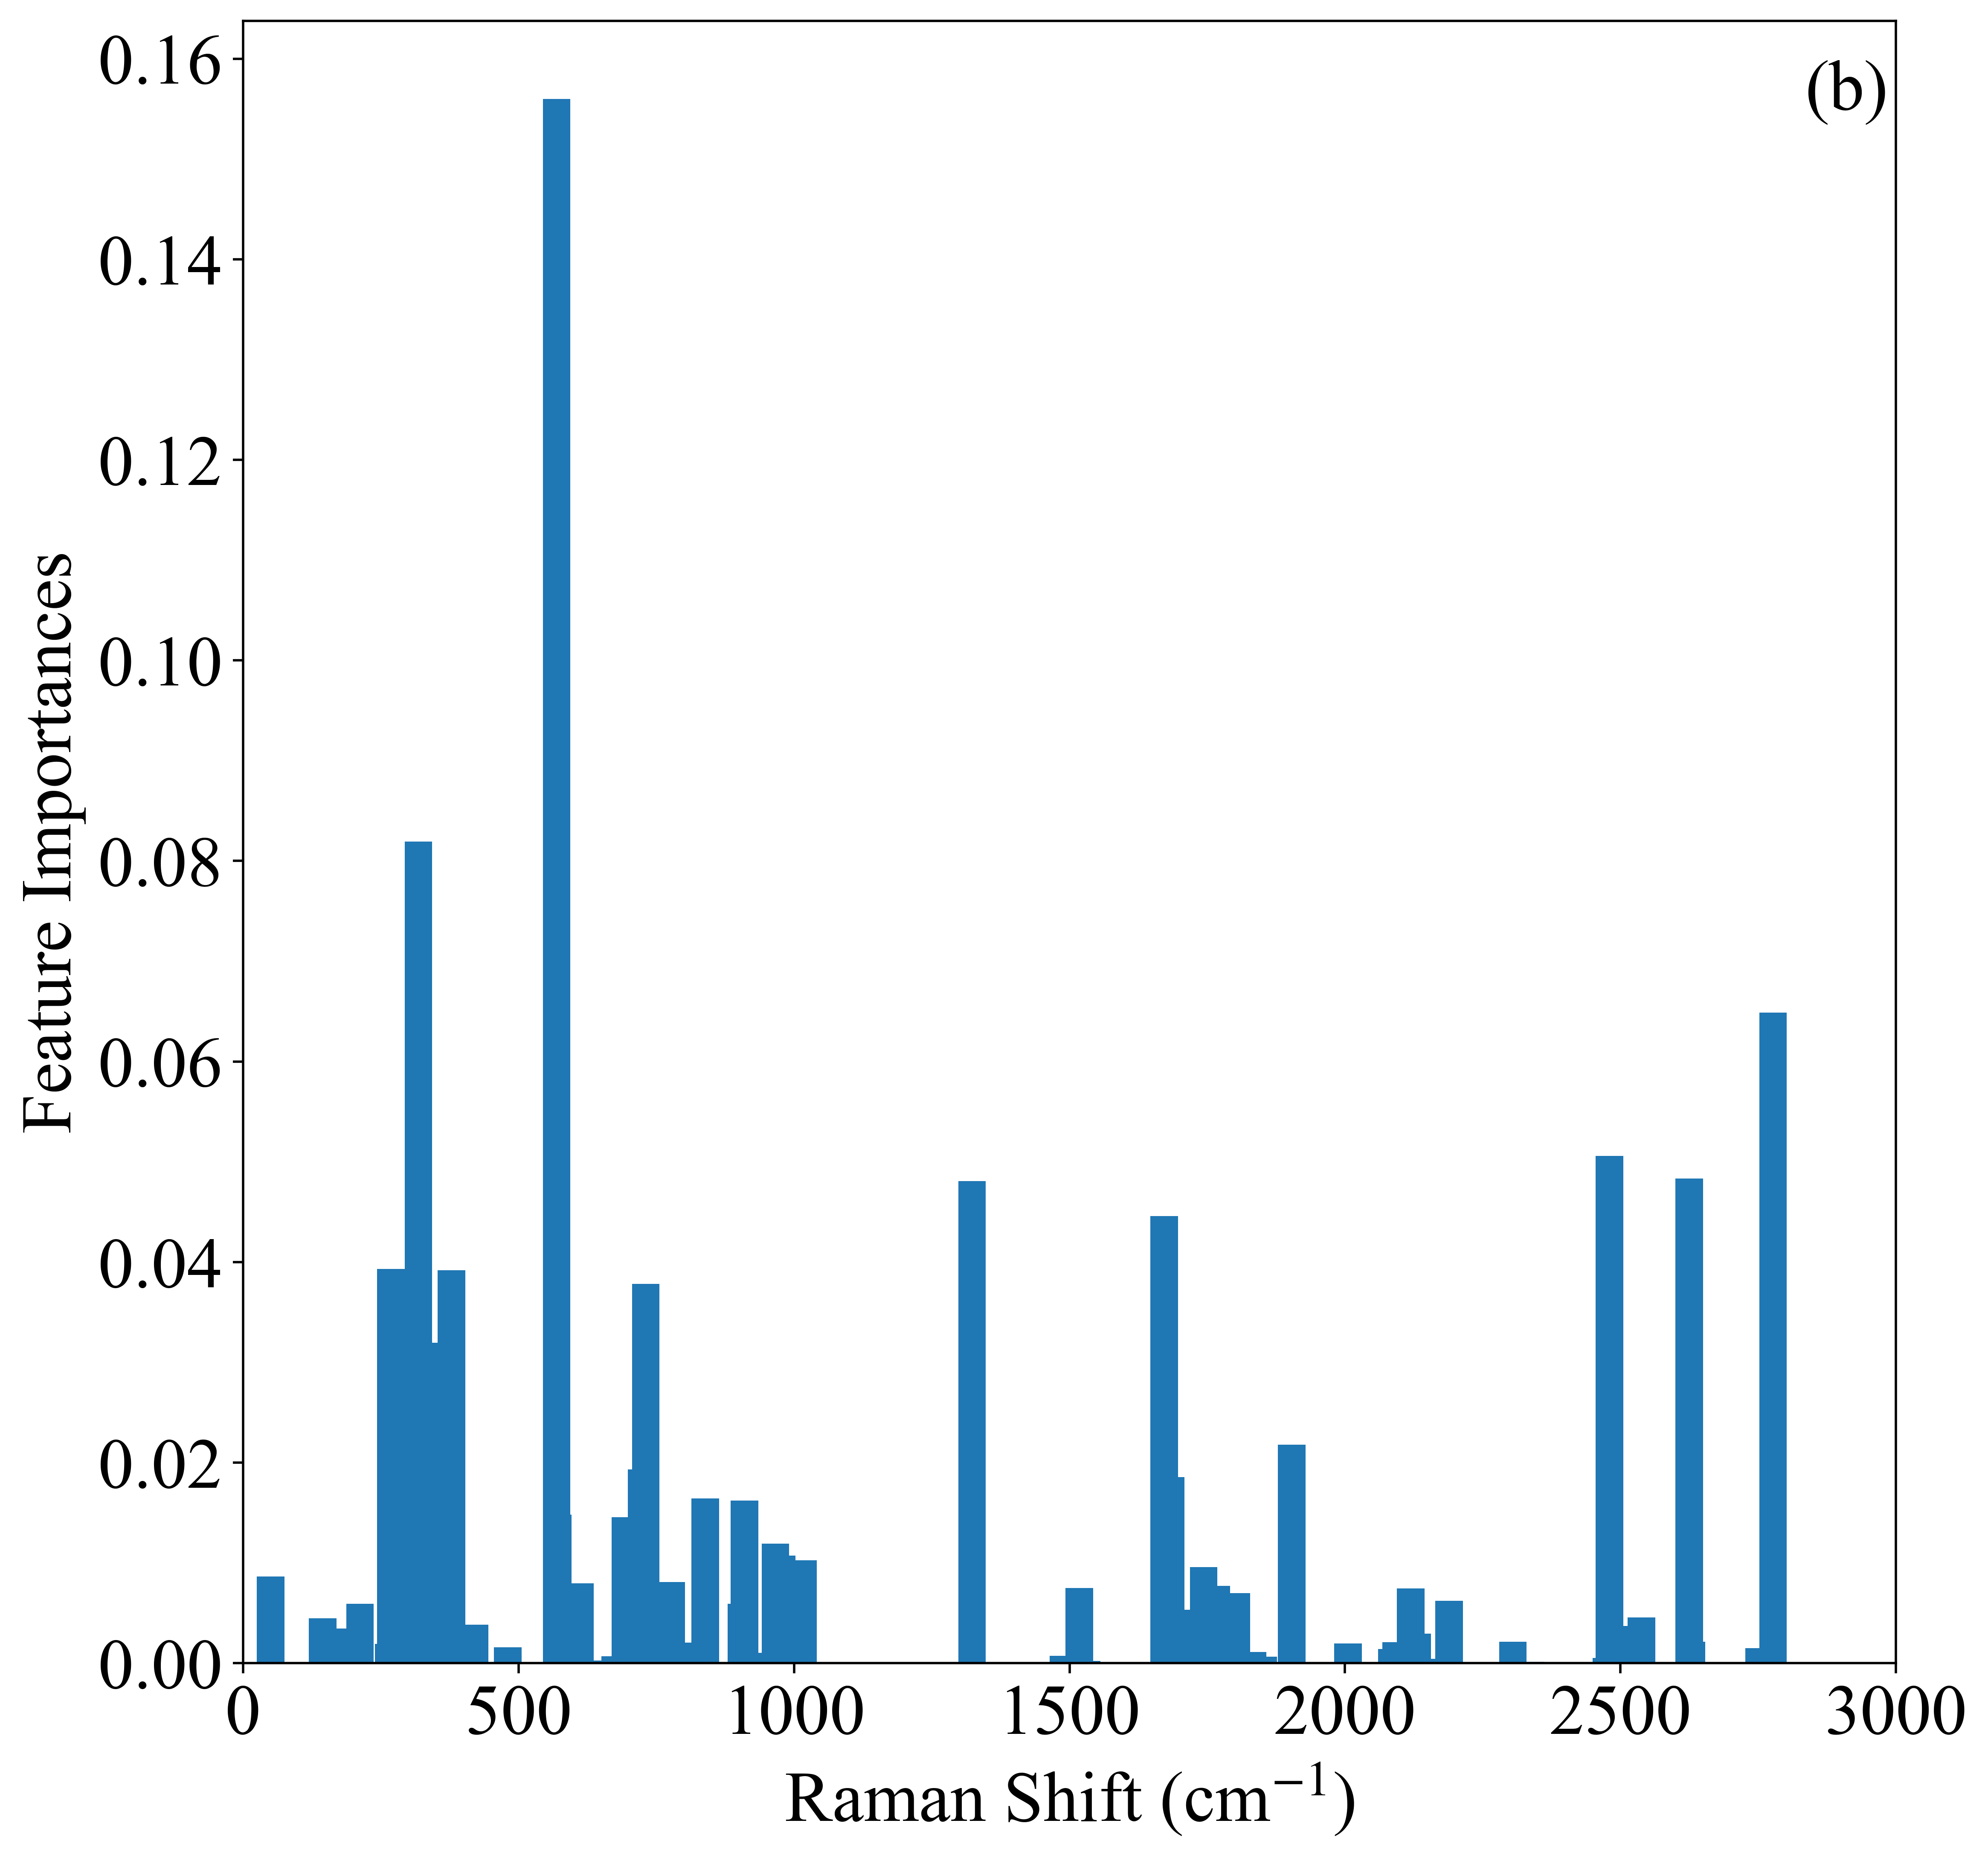

In [61]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(10,10)

bar_y=np.array(data_new.iloc[:,1])
bar_x=x1=np.linspace(50,3400,1738)
plt.bar(bar_x,bar_y,width=50)
plt.xlabel('Raman Shift (cm$^{-1}$)',family='Times New Roman',size=24)
plt.ylabel('Feature Importances',family='Times New Roman',size=24)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.xlim(0,3000)
plt.tick_params(labelsize=24)
plt.text(2835,0.155,'(b)',family='Times New Roman',size=24)
plt.show()

## 4.Regression Analysis for the Determination of Major Component Content

In [62]:
data=pd.read_excel(r"data\Raman datasets(with major component content).xlsx")
data.head()

50.32098   52.24945  54.17791999999999   56.10638   58.03485   59.96332  \
0  2137.808  2108.2400          2127.1430  2145.3740  2068.8860  1926.7920   
1   843.015   778.0334           737.3646   775.0638   793.3551   778.0346   
2  2443.815  2335.8090          2307.1140  2272.3710  2265.8010  2230.3550   
3     0.000     0.0000             0.0000     0.0000     0.0000     0.0000   
4     0.000     0.0000             0.0000     0.0000     0.0000     0.0000   

    61.89178   63.82025  65.74871999999999   67.67719  ...   3390.426  \
0  1816.0830  1811.2350          1850.1810  1709.2120  ... -1995.2750   
1   764.8843   799.1901           729.8372   681.7089  ...  -698.9503   
2  2099.7120  2051.8730          2003.2500  1881.3240  ... -2625.6390   
3     0.0000     0.0000             0.0000     0.0000  ...     0.0000   
4     0.0000     0.0000             0.0000     0.0000  ...     0.0000   

    3392.354   3394.282   3396.211   3398.139   3400.068  type   ssa   ssc  \
0 -2019.9670 -2214.8860 -2213.3020 -1983.1690 -2022.7500     0  40.0  8.74   
1  -802.5234  -787.3817  -799.3686  -728.0889  -727.4656     0  40.0  8.74   
2 -2659.9940 -2598.0200 -2584.0160 -2563.7860 -2430.7110     0  40.0  8.74   
3     0.0000     0.0000     0.0000     0.0000     0.0000     0  40.0  8.74   
4     0.0000     0.0000     0.0000     0.0000     0.0000     0  40.0  8.74   

     ssd  
0  19.45  
1  19.45  
2  19.45  
3  19.45  
4  19.45  

[5 rows x 1742 columns]

In [63]:
s=StandardScaler()
lda=LDA(n_components=2)
x=data.iloc[:,:-4]
x=s.fit_transform(x)
y=data.iloc[:,-4]
result=lda.fit_transform(x,y)
data1=pd.DataFrame(result)
data1

0         1
0   -2.730963 -3.997748
1   -2.272015  0.189015
2   -2.361567 -3.917621
3   -2.871511 -4.041475
4   -1.948369 -4.130871
..        ...       ...
114  1.835049 -0.537130
115  0.560744 -0.328495
116  1.361518 -1.010804
117  1.788161 -0.698198
118  1.923937 -0.388856

[119 rows x 2 columns]

In [64]:
lda.explained_variance_ratio_

array([0.59327335, 0.22082427])

In [65]:
data1=data1.sample(len(data1), random_state=10)
data=data.sample(len(data), random_state=10)
data1

0         1
45  -5.679741  1.636841
95   4.626335  0.959426
56   2.752783  0.703301
84   4.156051  1.195007
98   4.700709  2.181646
..        ...       ...
113  1.642429 -0.710127
64   1.017195  1.358763
15  -2.465503 -3.551901
100  4.210432  1.250164
9   -2.370498 -4.419276

[119 rows x 2 columns]

In [66]:
train_x=data1.iloc[:80]
train_y1=data.iloc[:80,-3]
train_y2=data.iloc[:80,-2]
train_y3=data.iloc[:80,-1]

test_x=data1.iloc[80:]
test_y1=data.iloc[80:,-3]
test_y2=data.iloc[80:,-2]
test_y3=data.iloc[80:,-1]

0.9619273590524829
3.4882605774927558


Text(38, 110, '(a)')

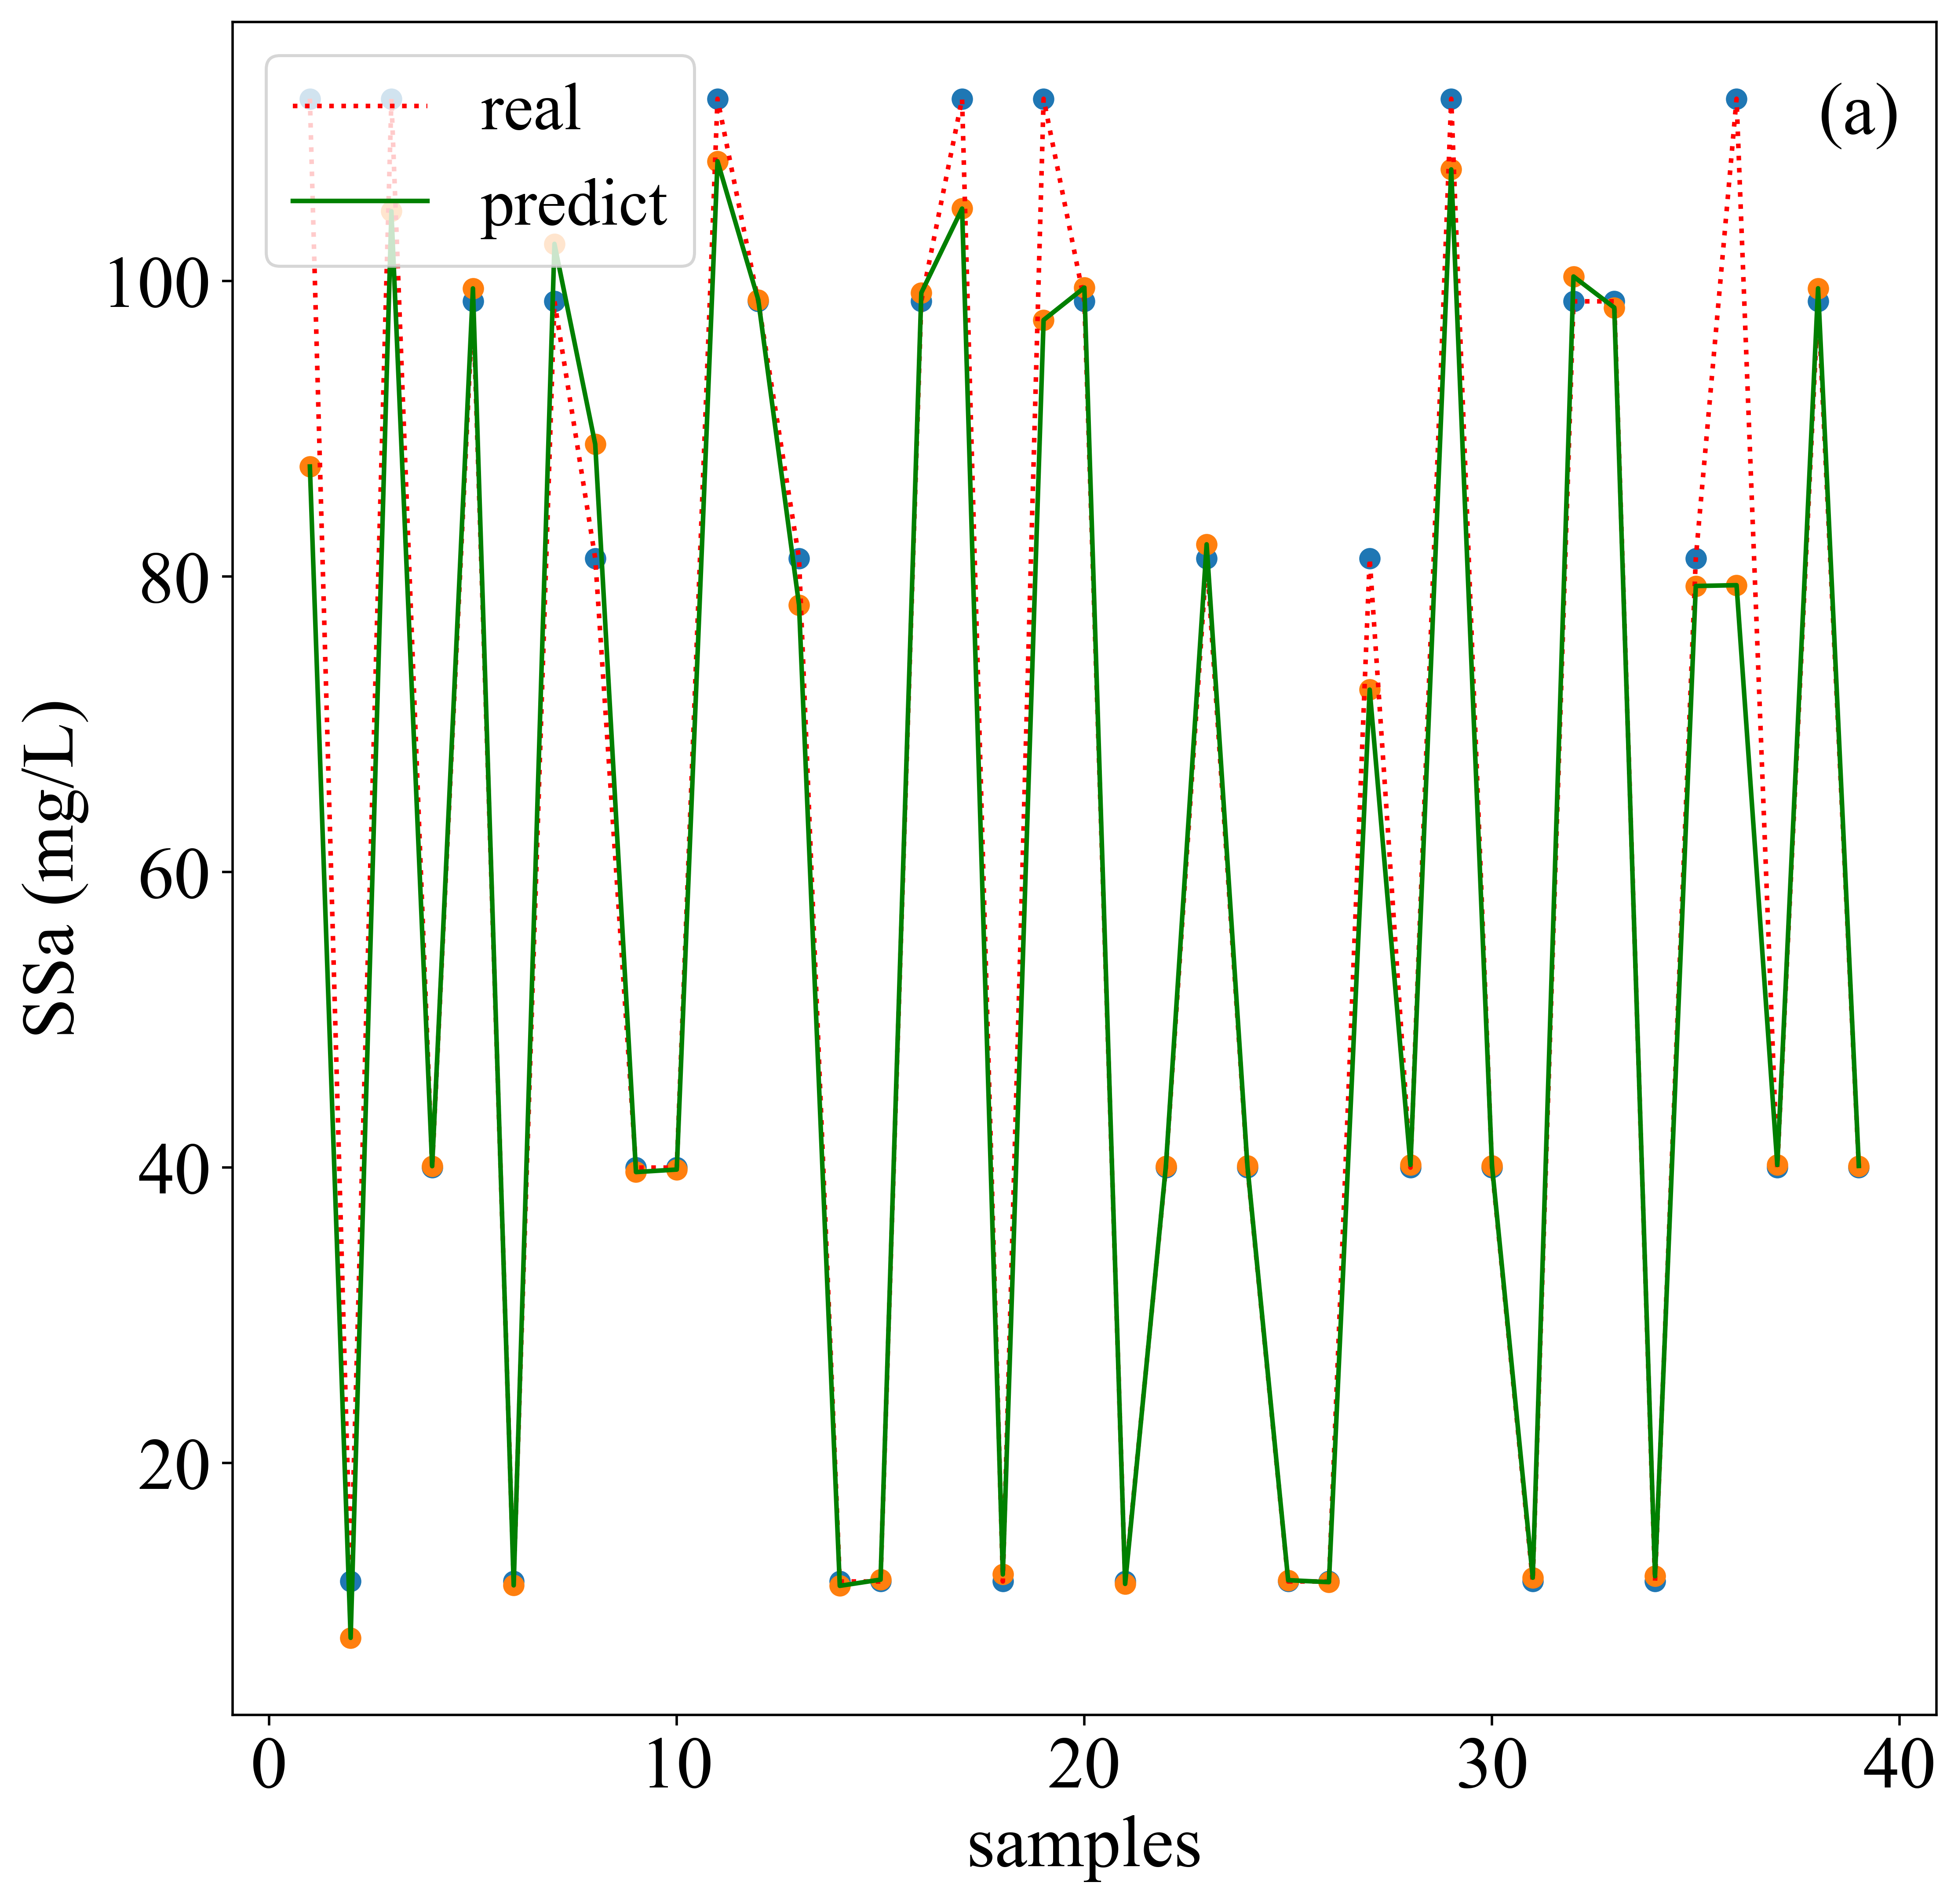

In [67]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(10,10)

model_1=SVR(C=1100,kernel='rbf')
model_1_ssa=model_1.fit(train_x,train_y1)
ssa_1=model_1_ssa.predict(test_x)
print(r2_score(test_y1,ssa_1))
print(mean_absolute_error(test_y1,ssa_1))
a=np.arange(1,40,1)
plt.plot(a,test_y1,c='r',label='real',linestyle='dotted')
plt.plot(a,ssa_1,c='g',label='predict')
plt.scatter(a,test_y1)
plt.scatter(a,ssa_1)
plt.legend()
plt.xlabel('samples',fontsize=24,family='Times New Roman')
plt.ylabel('SSa (mg/L)',fontsize=24,family='Times New Roman')
font = {'family': 'Times New Roman','size': 22}
plt.legend(loc="upper left",prop=font)
plt.tick_params(labelsize=24)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.text(38,110,'(a)',family='Times New Roman',size=24)

0.9513216468683616
1.6183514131655352


Text(38, 41, '(b)')

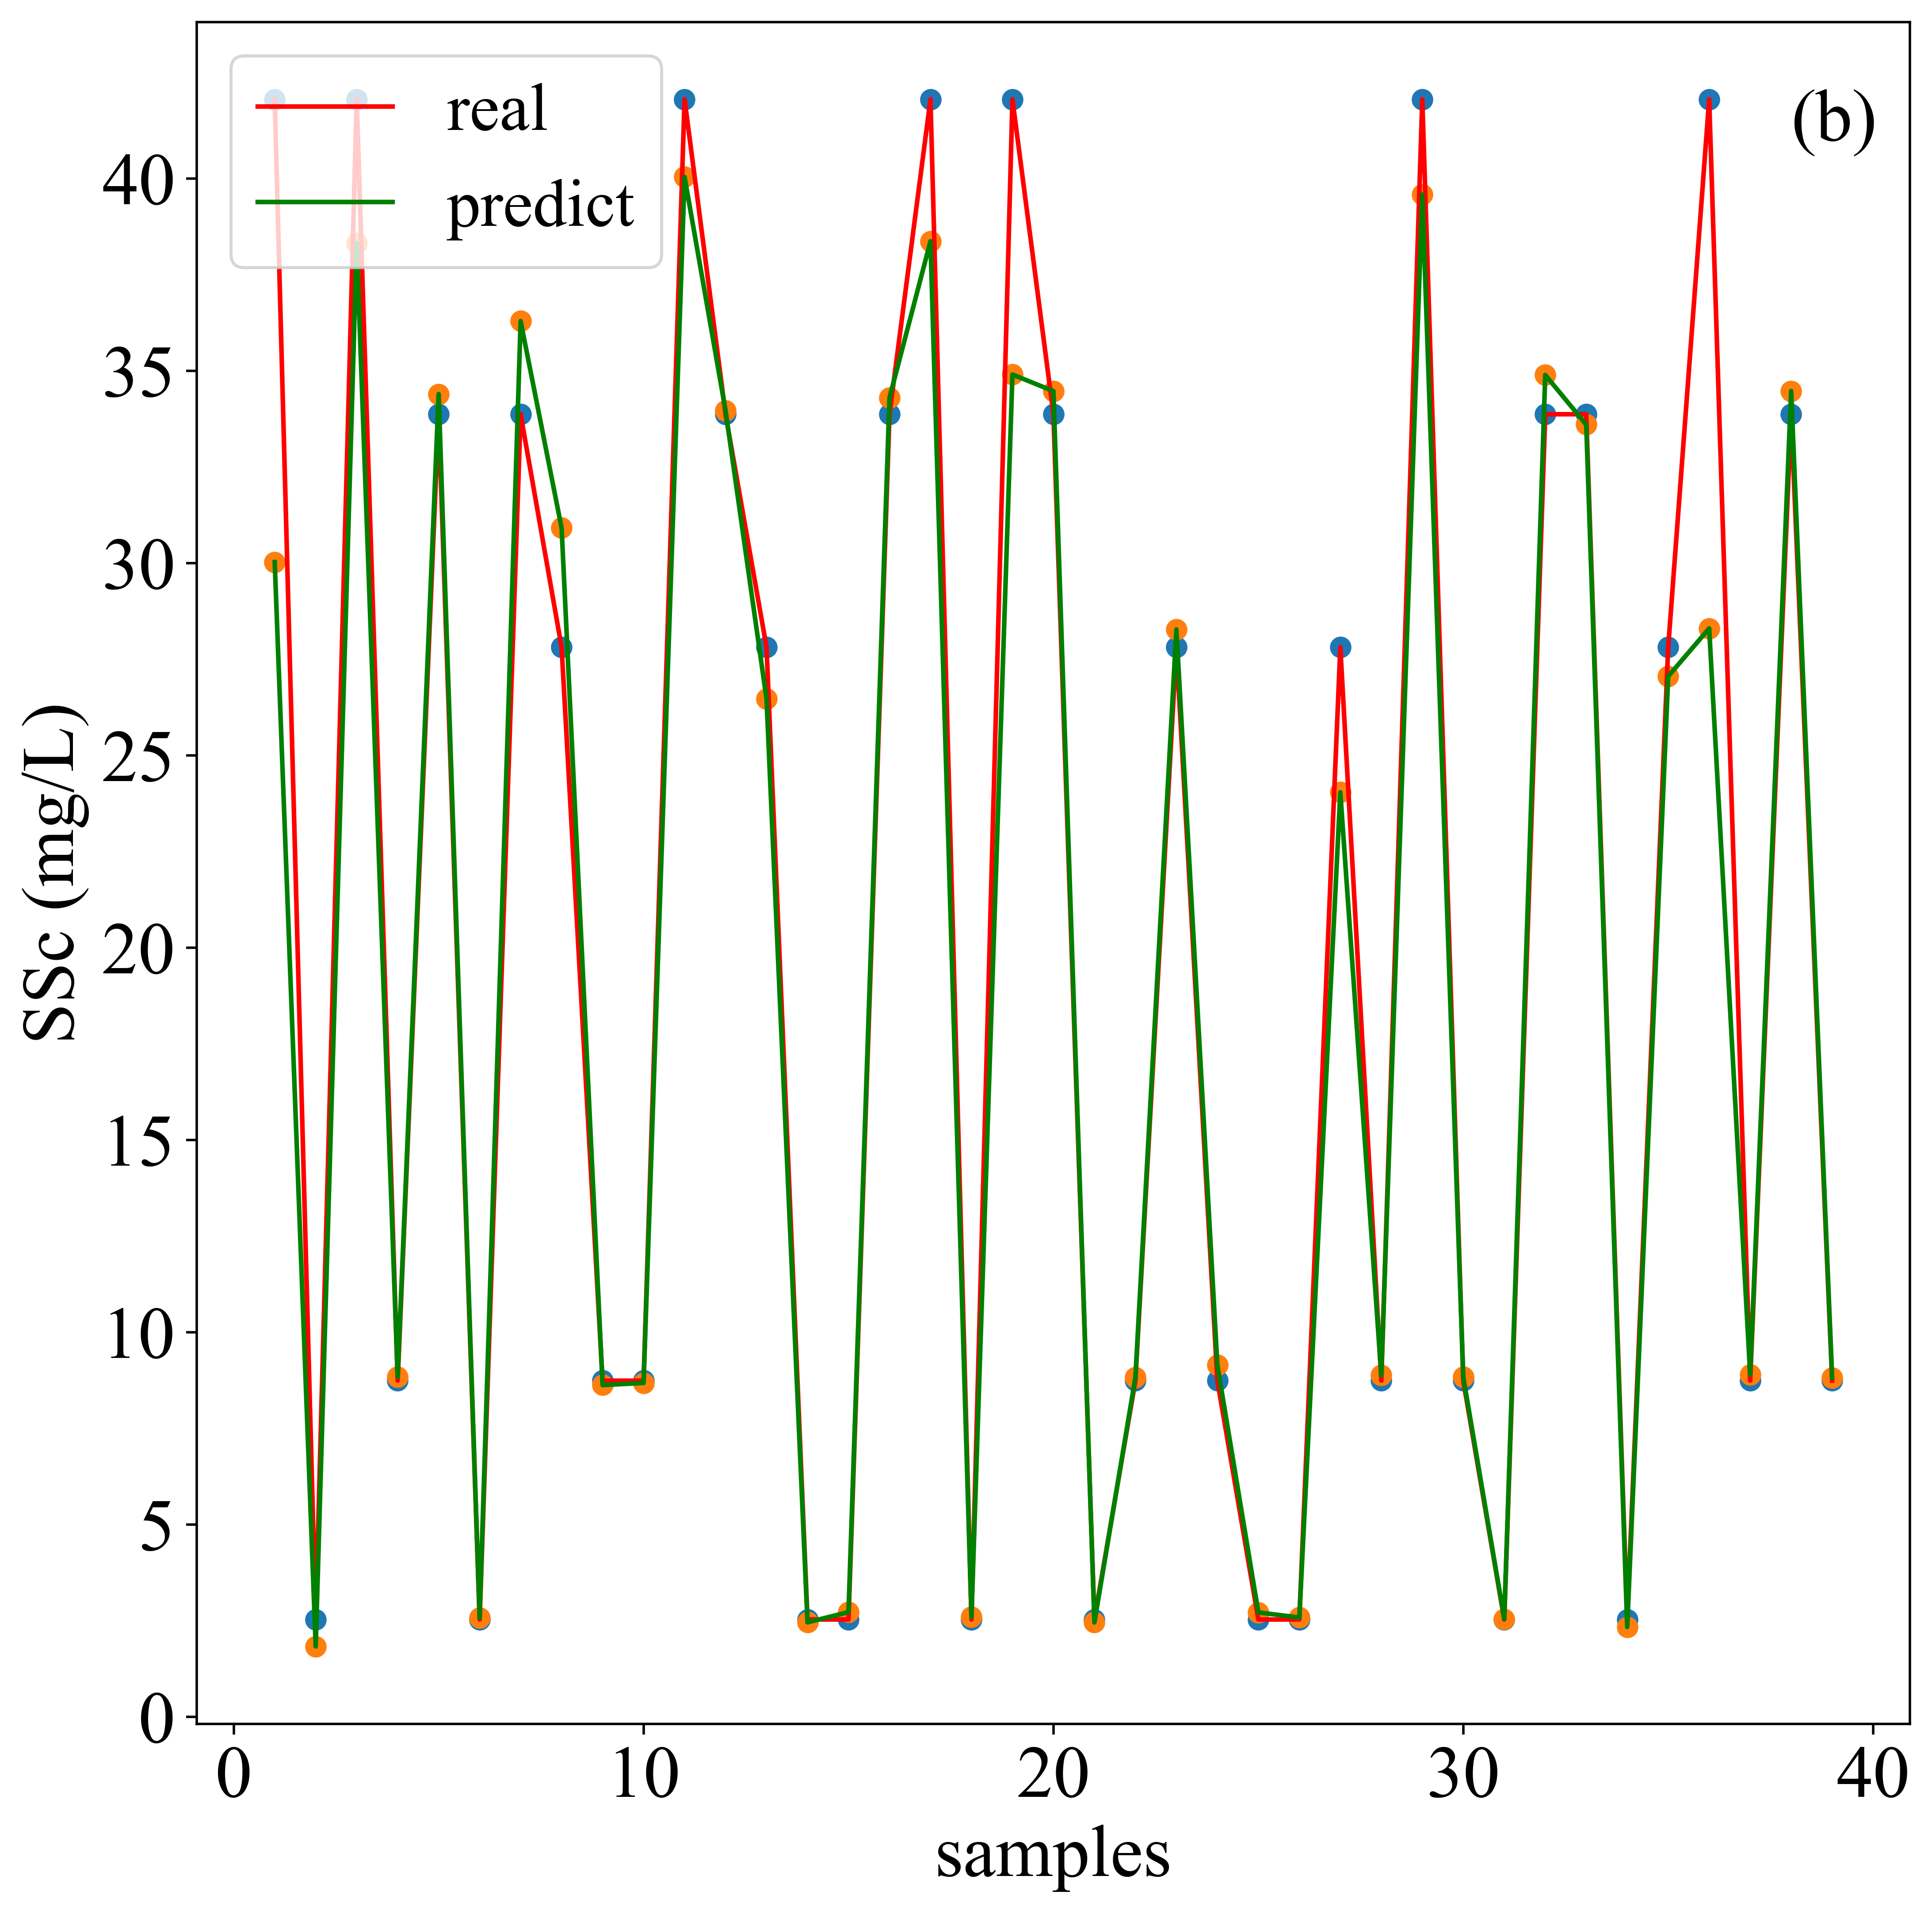

In [68]:
model_1=SVR(C=800,kernel='rbf')
model_1_ssa=model_1.fit(train_x,train_y2)
ssa_1=model_1_ssa.predict(test_x)
print(r2_score(test_y2,ssa_1))
print(mean_absolute_error(test_y2,ssa_1))
a=np.arange(1,40,1)
plt.plot(a,test_y2,label='real',c='r')
plt.plot(a,ssa_1,label='predict',c='g')
plt.scatter(a,test_y2)
plt.scatter(a,ssa_1)
plt.legend()

plt.xlabel('samples',fontsize=24,family='Times New Roman')
plt.ylabel('SSc (mg/L)',fontsize=24,family='Times New Roman')
font = {'family': 'Times New Roman','size': 22}
plt.legend(loc="upper left",prop=font)
plt.tick_params(labelsize=24)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.text(38,41,'(b)',family='Times New Roman',size=24)

0.9747736267176896
2.3712312992467033


Text(38, 81, '(c)')

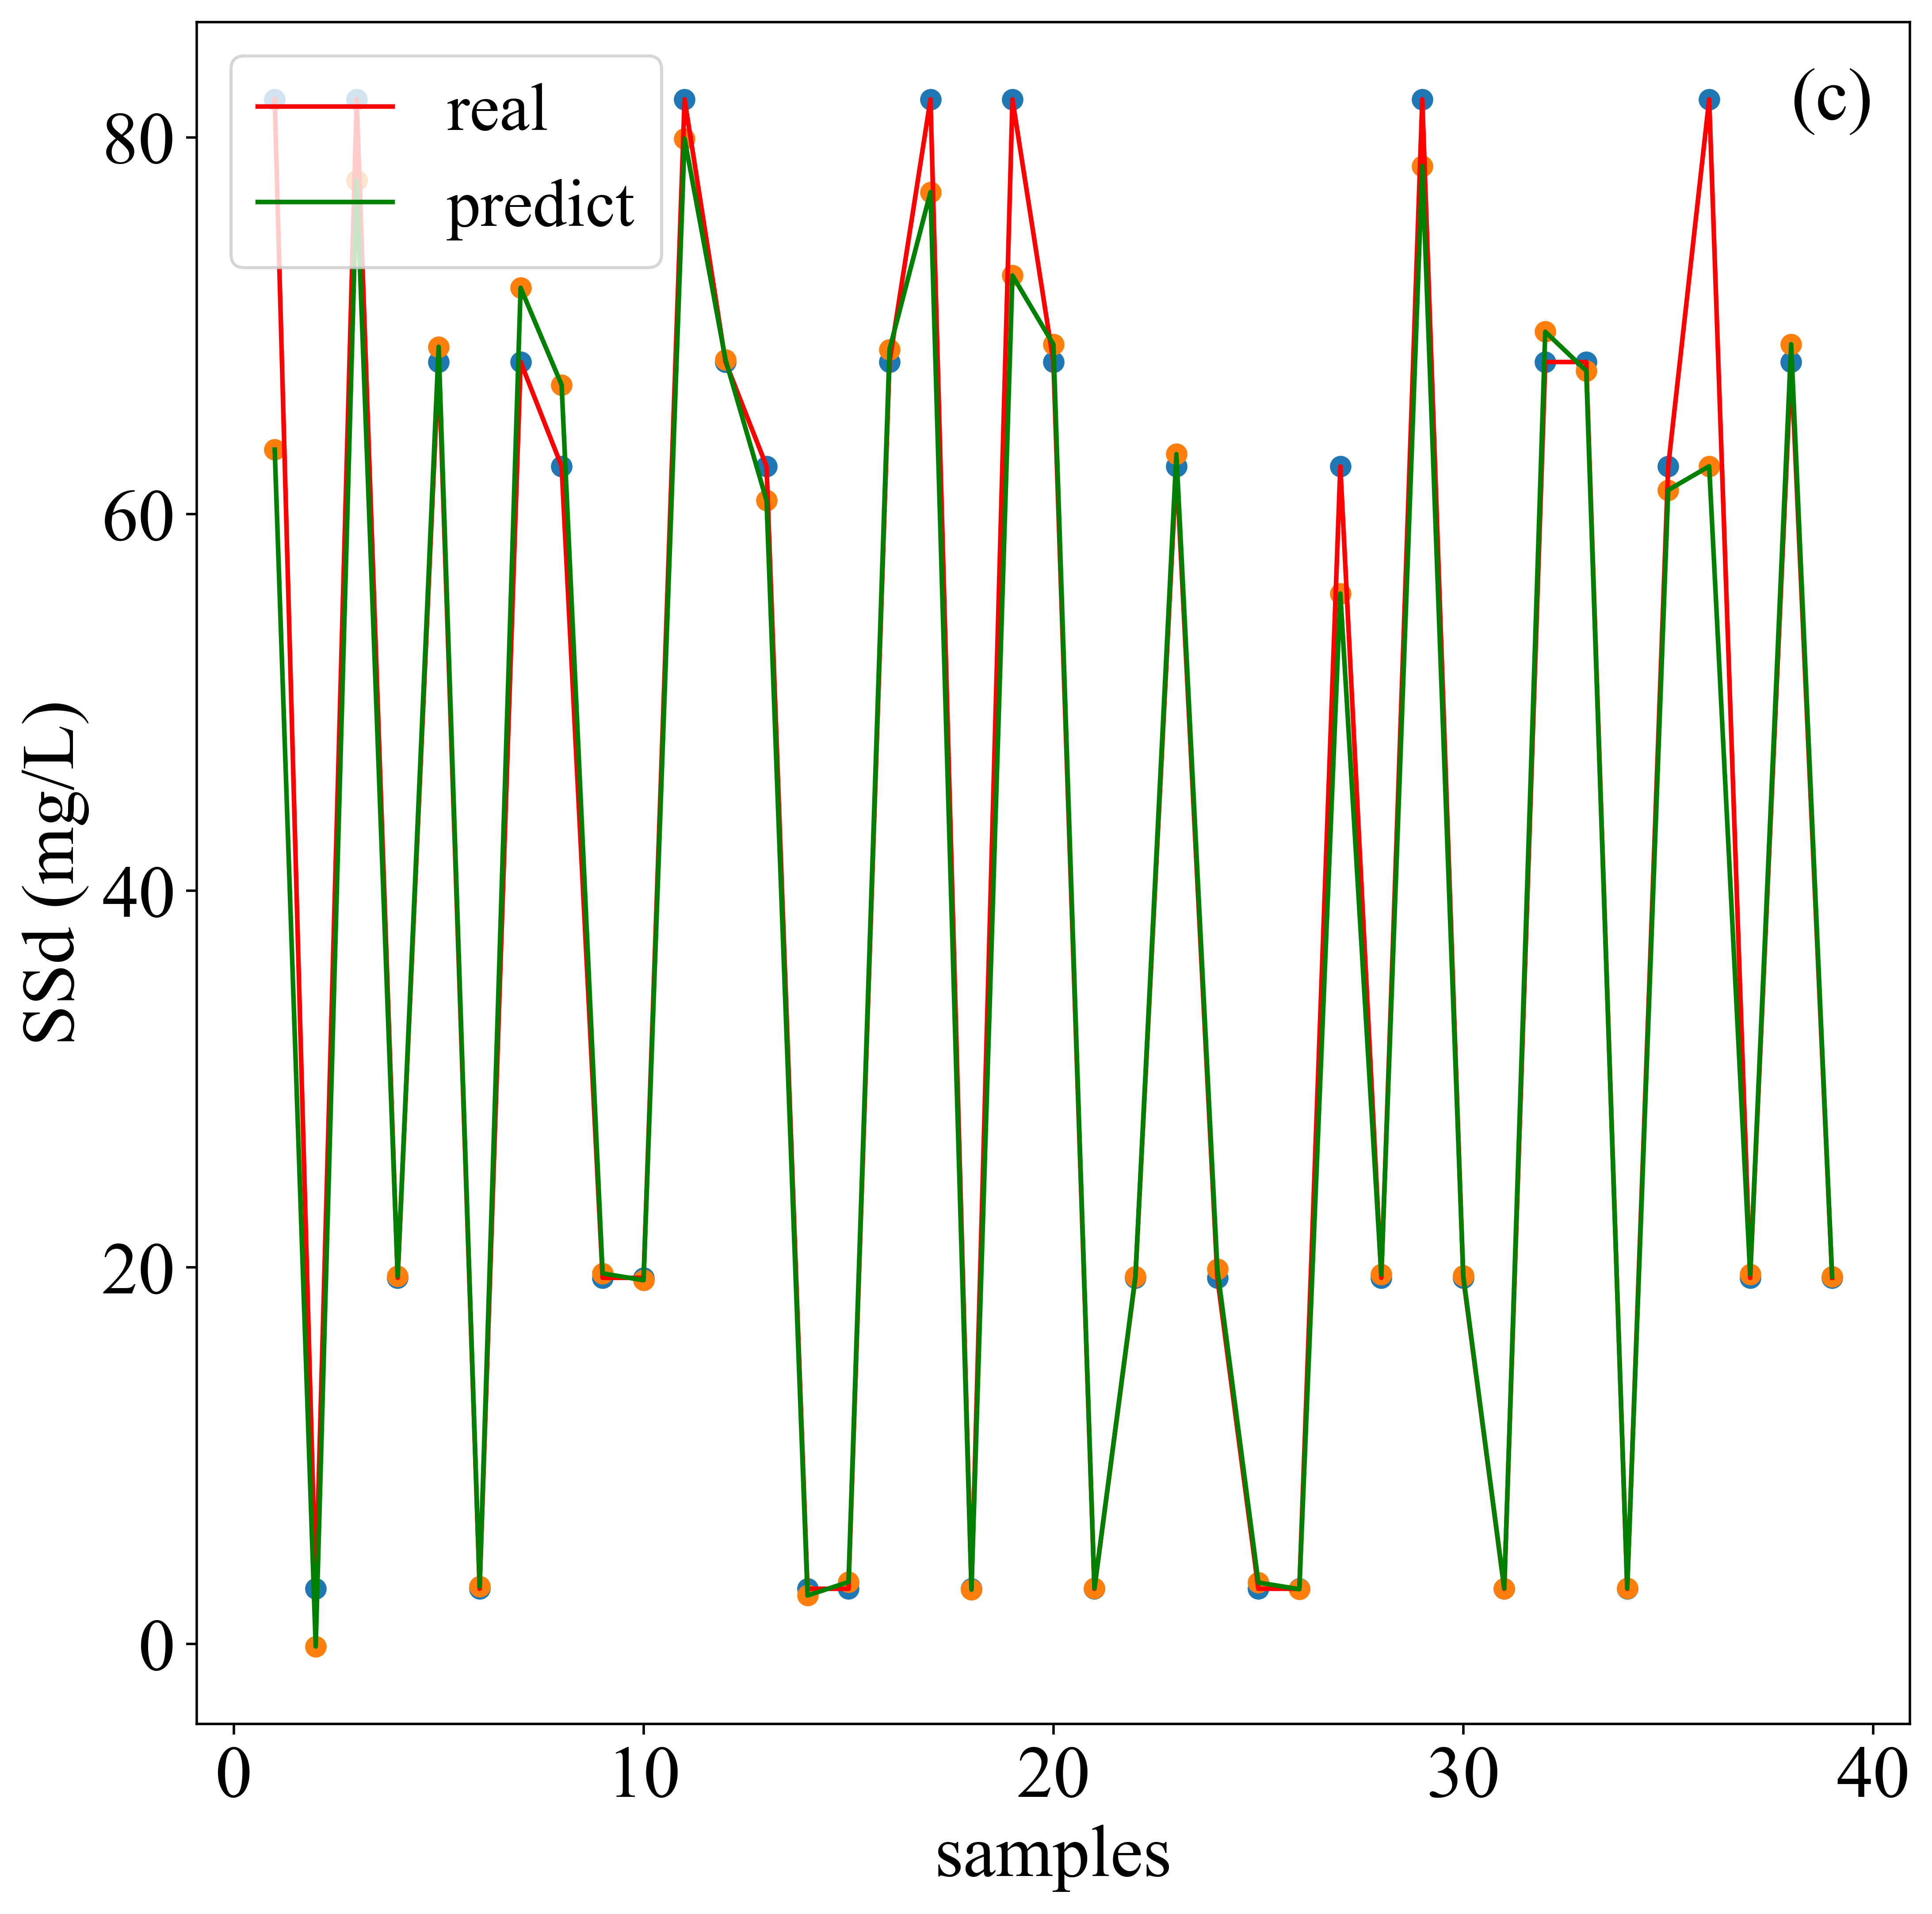

In [69]:
model_1=SVR(C=1200,kernel='rbf')
model_1_ssa=model_1.fit(train_x,train_y3)
ssa_1=model_1_ssa.predict(test_x)
print(r2_score(test_y3,ssa_1))
print(mean_absolute_error(test_y3,ssa_1))
a=np.arange(1,40,1)
plt.plot(a,test_y3,label='real',c='r')
plt.plot(a,ssa_1,label='predict',c='g')
plt.scatter(a,test_y3)
plt.scatter(a,ssa_1)
plt.legend()

plt.xlabel('samples',fontsize=24,family='Times New Roman')
plt.ylabel('SSd (mg/L)',fontsize=24,family='Times New Roman')
font = {'family': 'Times New Roman','size': 22}
plt.legend(loc="upper left",prop=font)
plt.tick_params(labelsize=24)
plt.xticks(family='Times New Roman')
plt.yticks(family='Times New Roman')
plt.text(38,81,'(c)',family='Times New Roman',size=24)